## **Projet: Times series**

Ce notebook contient l'exploration et la modélisation de séries temporelles de ventes. Voici un résumé des sections principales :

- **Génération de données synthétiques** : Création d'une série temporelle avec tendance, saisonnalité et bruit.
- **Modèle Naïf (Baseline)** : Évaluation des performances d'un modèle simple de prédiction du dernier mois.
- **Régression Linéaire** : Application d'un modèle de régression avec des fonctionnalités élaborées (lags, saisonnalité).
- **Modèles TensorFlow** : Implémentation de réseaux de neurones (MLP, LSTM, GRU) pour la prédiction de séries temporelles.
- **Fonctions de Fenêtrage** : Utilitaires pour préparer les données pour les modèles de séries temporelles.
- **Analyse du Dataset M5** : Exploration et visualisation d'un dataset de ventes réel.

### Résultats Clés

- Le modèle GRU a montré les meilleures performances sur l'ensemble de validation sur les données synthétiques.
- Le modèle de régression linéaire a surpassé la baseline naïve.

### Améliorations Futures

- Optimisation des hyperparamètres des modèles TensorFlow.
- Intégration de caractéristiques externes (prix, événements) pour les prévisions.
- Utilisation de modèles plus avancés pour les séries temporelles (ex: Prophet, ARIMA, Transformers).

/tmp/ipython-input-2366798770.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2019-01-01', periods=n, freq='M')


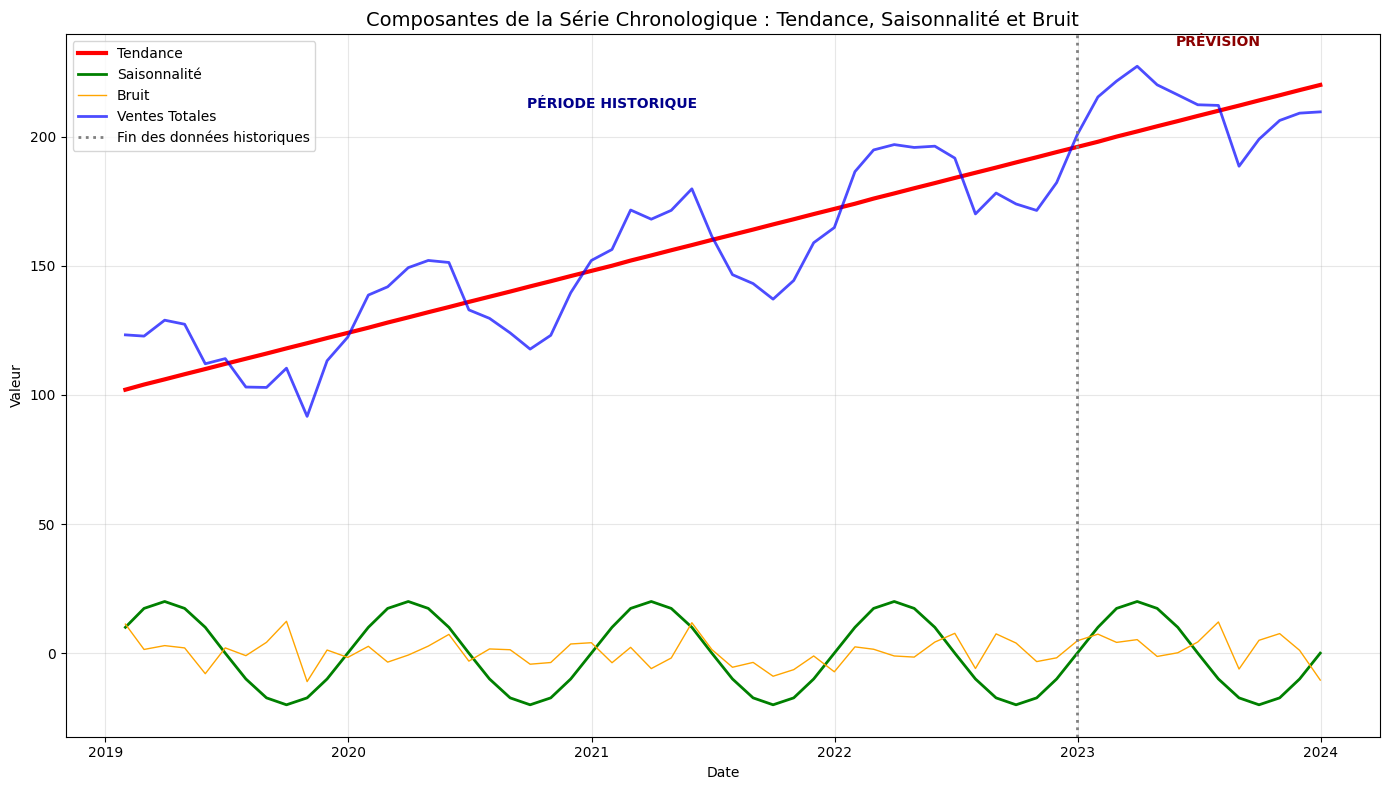

=== STATISTIQUES DES COMPOSANTES ===
Tendance - Min: 102.00, Max: 220.00
Saisonnalité - Min: -20.00, Max: 20.00
Bruit - Min: -11.01, Max: 12.33
Ventes - Min: 91.67, Max: 227.23

=== RÉPARTITION DES DONNÉES ===
Données historiques (4 ans): 48 mois
Période de prévision (1 an): 12 mois


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Paramètres
n = 60  # nombre total de périodes (5 ans * 12 mois)
beta0 = 100
beta1 = 2
A = 20
P = 12  # périodicité annuelle
sigma = 5

# Génération des données
T = np.arange(1, n + 1)  # temps de 1 à n

# Composantes
trend = beta0 + beta1 * T
seasonality = A * np.sin(2 * np.pi * T / P)
noise = np.random.normal(0, sigma, n)

# Série complète
sales = trend + seasonality + noise

# Création d'un DataFrame pour mieux visualiser
dates = pd.date_range(start='2019-01-01', periods=n, freq='M')
df = pd.DataFrame({
    'Date': dates,
    'Sales': sales,
    'Trend': trend,
    'Seasonality': seasonality,
    'Noise': noise
})

# Séparation données historiques (4 ans) et prévision (5ème année)
historical_data = df.iloc[:48]  # 4 ans * 12 mois
forecast_data = df.iloc[48:]    # 5ème année

# Visualisation dans un seul graphe
plt.figure(figsize=(14, 8))

# Tendance, saisonnalité et bruit sur le même graphe
plt.plot(df['Date'], df['Trend'], label='Tendance', linewidth=3, color='red', linestyle='-')
plt.plot(df['Date'], df['Seasonality'], label='Saisonnalité', linewidth=2, color='green', linestyle='-')
plt.plot(df['Date'], df['Noise'], label='Bruit', linewidth=1, color='orange', linestyle='-')
plt.plot(df['Date'], df['Sales'], label='Ventes Totales', linewidth=2, color='blue', linestyle='-', alpha=0.7)

# Ligne verticale pour séparer historique et prévision
plt.axvline(x=historical_data['Date'].iloc[-1], color='gray', linestyle=':',
            linewidth=2, label='Fin des données historiques')

plt.title('Composantes de la Série Chronologique : Tendance, Saisonnalité et Bruit', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True, alpha=0.3)

# Ajouter des annotations
plt.text(historical_data['Date'].iloc[24], historical_data['Trend'].max() + 15,
         'PÉRIODE HISTORIQUE', ha='center', fontweight='bold', color='darkblue')
plt.text(forecast_data['Date'].iloc[6], forecast_data['Trend'].max() + 15,
         'PRÉVISION', ha='center', fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

# Affichage des statistiques
print("=== STATISTIQUES DES COMPOSANTES ===")
print(f"Tendance - Min: {df['Trend'].min():.2f}, Max: {df['Trend'].max():.2f}")
print(f"Saisonnalité - Min: {df['Seasonality'].min():.2f}, Max: {df['Seasonality'].max():.2f}")
print(f"Bruit - Min: {df['Noise'].min():.2f}, Max: {df['Noise'].max():.2f}")
print(f"Ventes - Min: {df['Sales'].min():.2f}, Max: {df['Sales'].max():.2f}")

print(f"\n=== RÉPARTITION DES DONNÉES ===")
print(f"Données historiques (4 ans): {len(historical_data)} mois")
print(f"Période de prévision (1 an): {len(forecast_data)} mois")

<Figure size 1500x1000 with 0 Axes>

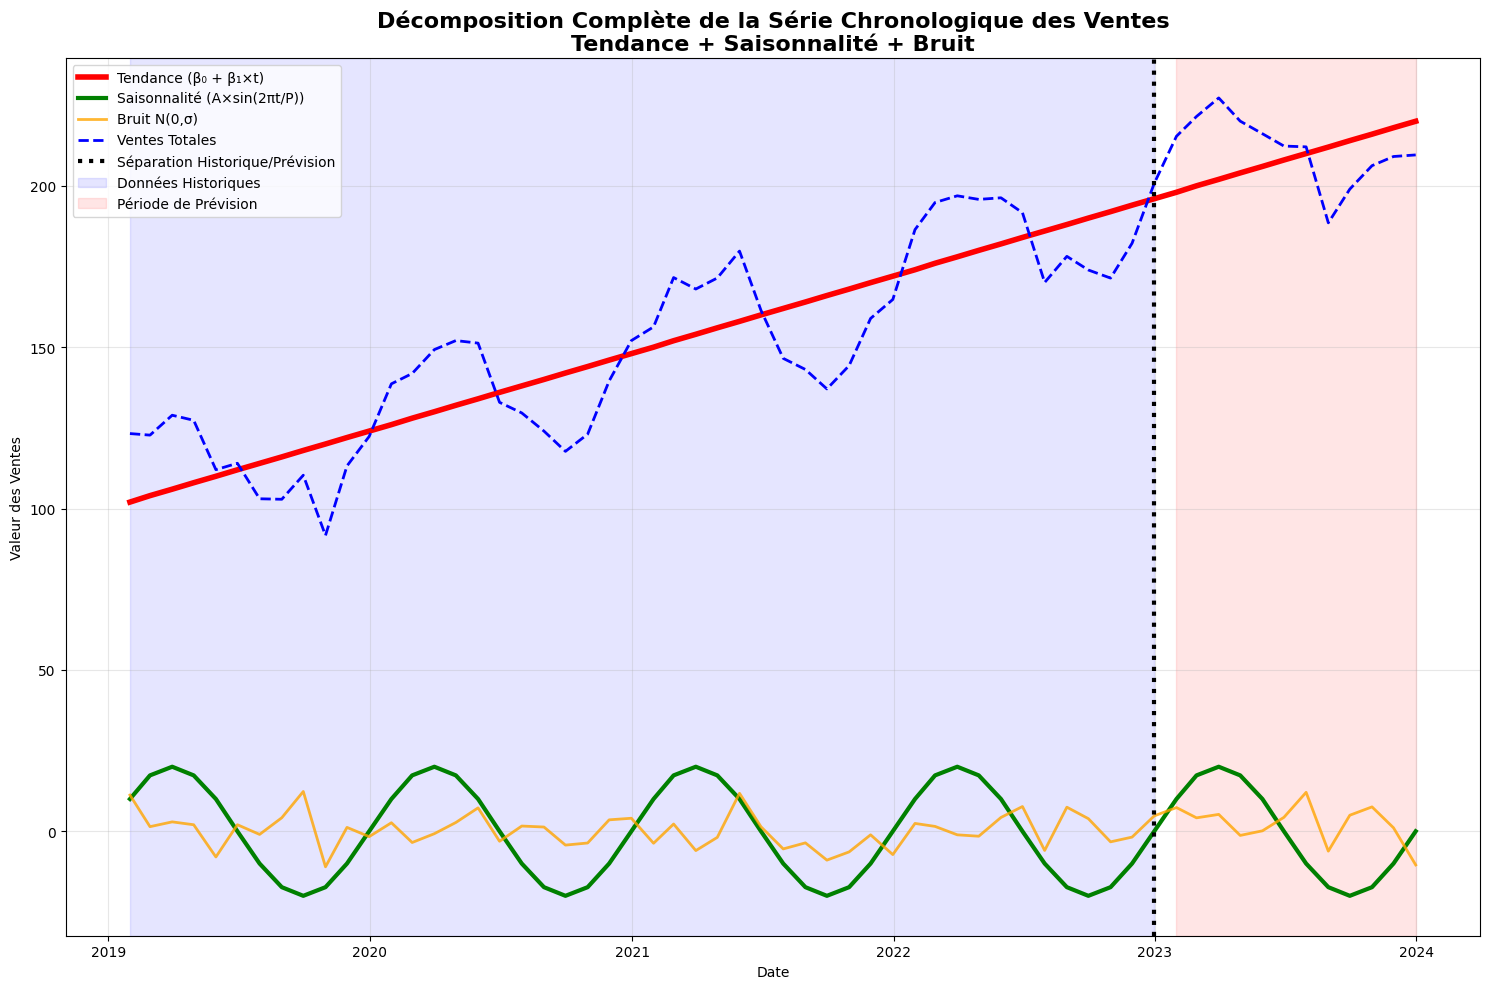

In [ ]:
# Version avec zones colorées
plt.figure(figsize=(15, 10))

# Création du graphe principal
fig, ax = plt.subplots(figsize=(15, 10))

# Plot des composantes
ax.plot(df['Date'], df['Trend'], label='Tendance (β₀ + β₁×t)', linewidth=4, color='red')
ax.plot(df['Date'], df['Seasonality'], label='Saisonnalité (A×sin(2πt/P))', linewidth=3, color='green')
ax.plot(df['Date'], df['Noise'], label='Bruit N(0,σ)', linewidth=2, color='orange', alpha=0.8)
ax.plot(df['Date'], df['Sales'], label='Ventes Totales', linewidth=2, color='blue', linestyle='--')

# Ligne de séparation
ax.axvline(x=historical_data['Date'].iloc[-1], color='black', linestyle=':',
           linewidth=3, label='Séparation Historique/Prévision')

# Zones colorées pour mieux distinguer les périodes
ax.axvspan(historical_data['Date'].iloc[0], historical_data['Date'].iloc[-1],
           alpha=0.1, color='blue', label='Données Historiques')
ax.axvspan(forecast_data['Date'].iloc[0], forecast_data['Date'].iloc[-1],
           alpha=0.1, color='red', label='Période de Prévision')

ax.set_title('Décomposition Complète de la Série Chronologique des Ventes\nTendance + Saisonnalité + Bruit',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Valeur des Ventes')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Créer une colonne pour la prévision naïve (valeur du mois précédent)
# Assurez-vous que l'index est une période de temps pour le décalage correct
df['Naive_Forecast'] = df['Sales'].shift(1)

# Séparer à nouveau les données historiques et de prévision avec la colonne Naive_Forecast
historical_data_naive = df.iloc[:48]
forecast_data_naive = df.iloc[48:]

# Pour la période de prévision, nous comparons les 'Sales' réelles avec les 'Naive_Forecast'
# Les prévisions naïves commencent à partir du 49ème mois (index 48)
actual_sales_forecast = forecast_data_naive['Sales']
naive_forecast_values = forecast_data_naive['Naive_Forecast']

# Supprimer la première valeur de la prévision naïve si elle est NaN (car pas de mois précédent dans le jeu de données historique)
# ou s'assurer que les indices correspondent bien si le shift(1) a créé un NaN au début de forecast_data_naive
# Une approche plus robuste est de s'assurer que les NaNs sont gérés ou que le shift est appliqué avant la séparation
# Ici, on va simplement ignorer les NaNs dans le calcul des métriques

# Filtrer les valeurs NaN si shift(1) a créé un NaN au début de la période de prévision
# La première valeur de naive_forecast_values sera NaN si le shift est fait sur l'ensemble du df puis coupé
# Nous devons nous assurer que les vraies valeurs et les prévisions ont la même longueur et n'ont pas de NaN
valid_indices = naive_forecast_values.dropna().index
actual_sales_forecast_valid = actual_sales_forecast.loc[valid_indices]
naive_forecast_values_valid = naive_forecast_values.loc[valid_indices]

# Calcul des métriques
mae = mean_absolute_error(actual_sales_forecast_valid, naive_forecast_values_valid)
mse = mean_squared_error(actual_sales_forecast_valid, naive_forecast_values_valid)
rmse = np.sqrt(mse)

# MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Évite la division par zéro et les pourcentages infinis
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_sales_forecast_valid, naive_forecast_values_valid)

# SMAPE (Symmetric Mean Absolute Percentage Error)
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    # Éviter la division par zéro
    return np.mean(numerator / np.where(denominator == 0, 1, denominator)) * 100

smape = symmetric_mean_absolute_percentage_error(actual_sales_forecast_valid, naive_forecast_values_valid)

print("=== Métriques du Modèle Naïf ===")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print(f"SMAPE (Symmetric Mean Absolute Percentage Error): {smape:.2f}%")

=== Métriques du Modèle Naïf ===
MAE (Mean Absolute Error): 7.18
MSE (Mean Squared Error): 90.79
RMSE (Root Mean Squared Error): 9.53
MAPE (Mean Absolute Percentage Error): 3.49%
SMAPE (Symmetric Mean Absolute Percentage Error): 3.47%


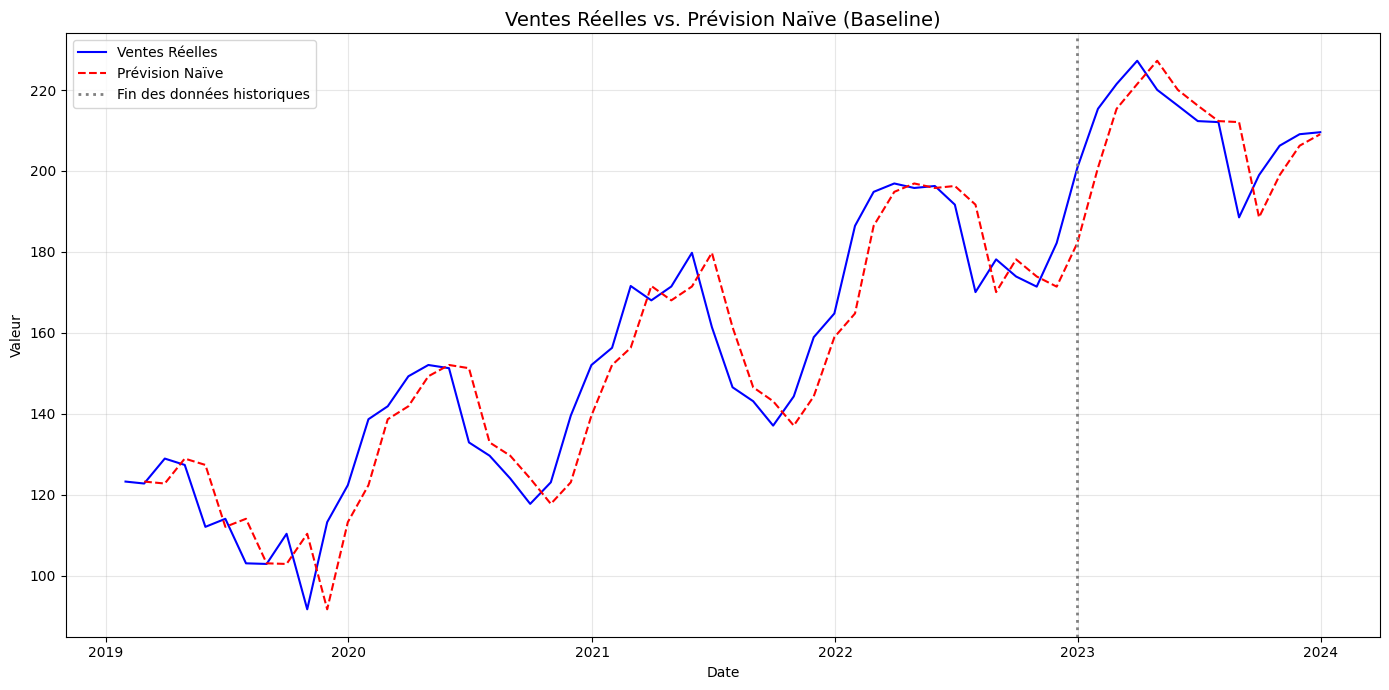

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Sales'], label='Ventes Réelles', color='blue')
plt.plot(df['Date'], df['Naive_Forecast'], label='Prévision Naïve', color='red', linestyle='--')

# Ligne verticale pour séparer historique et prévision
plt.axvline(x=historical_data['Date'].iloc[-1], color='gray', linestyle=':',
            linewidth=2, label='Fin des données historiques')

plt.title('Ventes Réelles vs. Prévision Naïve (Baseline)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
import pandas as pd
import os


# Chemin du dossier pour sauvegarder les métriques
save_path = '/content/drive/MyDrive/S9/applied-deep-learning'

# Créer le dossier s'il n'existe pas
os.makedirs(save_path, exist_ok=True)

# Créer un DataFrame pour les métriques
metrics_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'SMAPE'],
    'Value': [mae, mse, rmse, mape, smape]
}
metrics_df = pd.DataFrame(metrics_data)

# Nom du fichier de sauvegarde
file_name = 'naive_model_metrics.csv'
full_file_path = os.path.join(save_path, file_name)

# Sauvegarder le DataFrame en CSV
metrics_df.to_csv(full_file_path, index=False)

print(f"Les métriques ont été sauvegardées avec succès dans : {full_file_path}")

# Afficher le contenu sauvegardé pour vérification
print("\nContenu du fichier sauvegardé :")
display(pd.read_csv(full_file_path))

Les métriques ont été sauvegardées avec succès dans : /content/drive/MyDrive/S9/applied-deep-learning/naive_model_metrics.csv

Contenu du fichier sauvegardé :


,Metric,Value
0,MAE,7.184306
1,MSE,90.788851
2,RMSE,9.528318
3,MAPE,3.492836
4,SMAPE,3.468165


### Préparation des données pour un modèle de régression

Cette section crée des caractéristiques pertinentes pour un modèle de régression basé sur les données de séries chronologiques, telles que la tendance, les valeurs retardées (lags) des ventes et les indicateurs de saisonnalité mensuelle. Les données sont ensuite divisées en ensembles d'entraînement et de test en respectant l'ordre chronologique.

explication : L'objectif est de créer un jeu de données où chaque ligne représente une période (un mois) et contient les ventes à prédire (Sales) ainsi que toutes les caractéristiques pertinentes du passé ou du présent (t, Est_Janvier, Sales_t-1, Sales_t-12, etc.).

In [ ]:
import pandas as pd
import numpy as np

# Assurez-vous que df et T sont disponibles depuis les cellules précédentes
# Si ce n'est pas le cas, vous pourriez avoir besoin de réexécuter les premières cellules.

# --- 1. Ingénierie des Caractéristiques (Feature Engineering) ---

# Création d'une copie du DataFrame pour ne pas modifier l'original directement avec des NaNs
df_features = df.copy()

# Caractéristique de Tendance (le numéro de période)
df_features['Period'] = T  # T est déjà un np.array de 1 à n

# Caractéristiques de Ventes Retardées (Lagged Sales)
# Utilisons les ventes du mois précédent (lag 1), et du même mois de l'année précédente (lag 12)
df_features['Sales_lag_1'] = df_features['Sales'].shift(1)
df_features['Sales_lag_12'] = df_features['Sales'].shift(12)

# Caractéristiques de Saisonnalité (variables indicatrices pour chaque mois)
# pd.get_dummies crée des colonnes binaires (0 ou 1) pour chaque mois
month_dummies = pd.get_dummies(df_features['Date'].dt.month, prefix='Month', dtype=int)
df_features = pd.concat([df_features, month_dummies], axis=1)

# Suppression des lignes contenant des NaN introduits par les variables retardées
# La suppression des 12 premières lignes est nécessaire à cause de 'Sales_lag_12'
df_processed = df_features.dropna().copy()

print(f"Taille du DataFrame avant traitement des features: {len(df)} lignes")
print(f"Taille du DataFrame après feature engineering et suppression des NaNs: {len(df_processed)} lignes\n")

# --- 2. Définition des Caractéristiques (X) et de la Cible (y) ---

# Liste des caractéristiques à utiliser dans le modèle de régression
features_to_use = [
    'Period',
    'Sales_lag_1',
    'Sales_lag_12'
] + [col for col in df_processed.columns if 'Month_' in col] # Ajout des colonnes de mois

target_variable = 'Sales'

X = df_processed[features_to_use]
y = df_processed[target_variable]

print(f"Nombre de caractéristiques utilisées: {len(features_to_use)}")
print(f"Premières lignes de X (caractéristiques) :")
display(X.head())
print(f"Premières lignes de y (cible) :")
display(y.head())

# --- 3. Division des Données (Training/Test Split) ---

# Rappel: Les données originales ont 60 mois (n=60)
# 'historical_data' = 48 premiers mois
# 'forecast_data'   = 12 derniers mois

# Après dropna() (dû à Sales_lag_12), les 12 premières lignes sont retirées de df_features.
# Donc, df_processed commence à l'index original 12.
# Nous voulons que l'ensemble de test corresponde aux 12 mois de 'forecast_data' (indices originaux 48-59).
# L'ensemble d'entraînement sera donc les mois restants après le début des lags et avant le test.

# Nombre de mois dans l'ensemble de test (correspondant à forecast_data)
test_size_months = 12

# Calcul de la taille de l'ensemble d'entraînement
# len(df_processed) = 60 (total) - 12 (lags) = 48 lignes effectives
# train_size = 48 - 12 = 36 lignes pour l'entraînement
train_size = len(df_processed) - test_size_months

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

print(f"\n--- Division des données ---")
print(f"Taille de l'ensemble d'entraînement (X_train): {X_train.shape}")
print(f"Taille de l'ensemble de test (X_test): {X_test.shape}")
print(f"Taille de l'ensemble d'entraînement (y_train): {y_train.shape}")
print(f"Taille de l'ensemble de test (y_test): {y_test.shape}")

print("\nLa préparation des données est terminée. X_train, X_test, y_train, y_test sont prêts pour l'entraînement d'un modèle de régression.")

Taille du DataFrame avant traitement des features: 60 lignes
Taille du DataFrame après feature engineering et suppression des NaNs: 48 lignes

Nombre de caractéristiques utilisées: 15
Premières lignes de X (caractéristiques) :


,Period,Sales_lag_1,Sales_lag_12,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
12,13,122.343805,123.231059,1,0,0,0,0,0,0,0,0,0,0,0
13,14,138.643368,122.750131,0,1,0,0,0,0,0,0,0,0,0,0
14,15,141.843099,128.915214,0,0,1,0,0,0,0,0,0,0,0,0
15,16,149.255709,127.343893,0,0,0,1,0,0,0,0,0,0,0,0
16,17,152.045306,112.041726,0,0,0,0,1,0,0,0,0,0,0,0


Premières lignes de y (cible) :


,Sales
12,138.643368
13,141.843099
14,149.255709
15,152.045306
16,151.255648



--- Division des données ---
Taille de l'ensemble d'entraînement (X_train): (36, 15)
Taille de l'ensemble de test (X_test): (12, 15)
Taille de l'ensemble d'entraînement (y_train): (36,)
Taille de l'ensemble de test (y_test): (12,)

La préparation des données est terminée. X_train, X_test, y_train, y_test sont prêts pour l'entraînement d'un modèle de régression.


=== ENTRAÎNEMENT DU MODÈLE DE RÉGRESSION LINÉAIRE ===

=== MÉTRIQUES DU MODÈLE DE RÉGRESSION LINÉAIRE ===
MAE (Mean Absolute Error): 6.99
MSE (Mean Squared Error): 65.29
RMSE (Root Mean Squared Error): 8.08
MAPE (Mean Absolute Percentage Error): 3.32%
SMAPE (Symmetric Mean Absolute Percentage Error): 3.36%

=== COMPARAISON AVEC LE MODÈLE NAÏF (BASELINE) ===
    Métrique  Régression       Naïf Amélioration
0        MAE    6.988155   7.184306        +2.7%
1        MSE   65.286268  90.788851       +28.1%
2       RMSE    8.079992   9.528318       +15.2%
3   MAPE (%)    3.323257   3.492836        +4.9%
4  SMAPE (%)    3.362624   3.468165        +3.0%


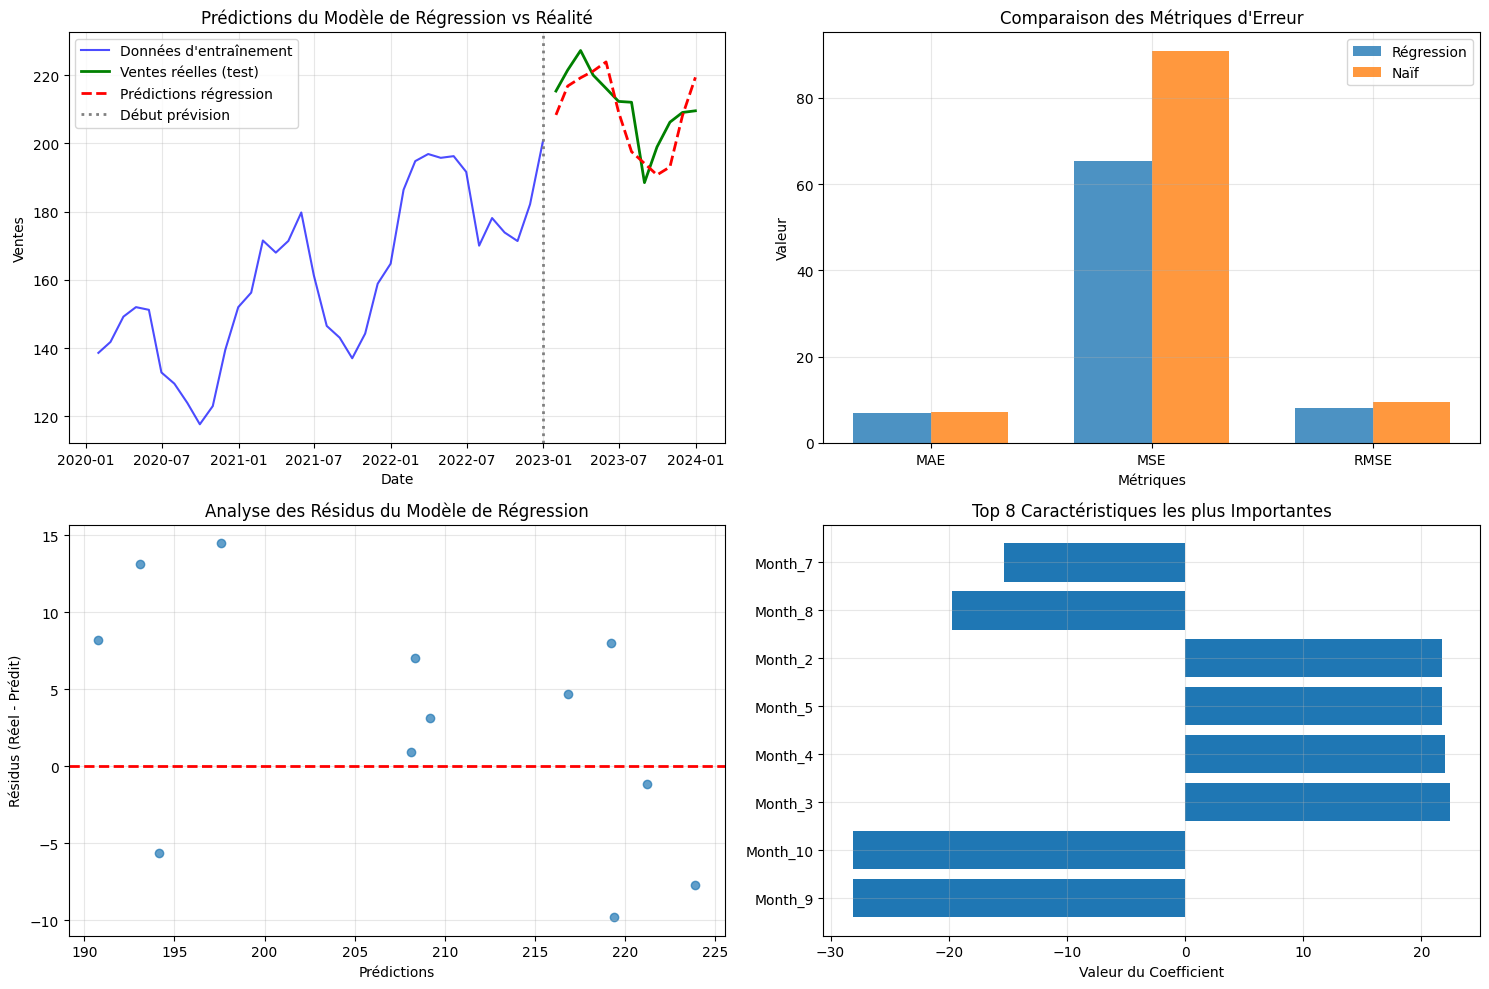


=== SAUVEGARDE DES MÉTRIQUES ===
Comparaison des modèles sauvegardée dans : /content/drive/MyDrive/S9/applied-deep-learning/regression_vs_naive_comparison.csv
Détails des prédictions sauvegardés dans : /content/drive/MyDrive/S9/applied-deep-learning/detailed_predictions.csv

=== ANALYSE DÉTAILLÉE DES PERFORMANCES ===
Le modèle de régression utilise 15 caractéristiques:
  1. Period
  2. Sales_lag_1
  3. Sales_lag_12
  4. Month_1
  5. Month_2
  6. Month_3
  7. Month_4
  8. Month_5
  9. Month_6
  10. Month_7
  11. Month_8
  12. Month_9
  13. Month_10
  14. Month_11
  15. Month_12

Coefficient de détermination (R²) sur l'ensemble de test: 0.3357
Intercept du modèle: 121.50


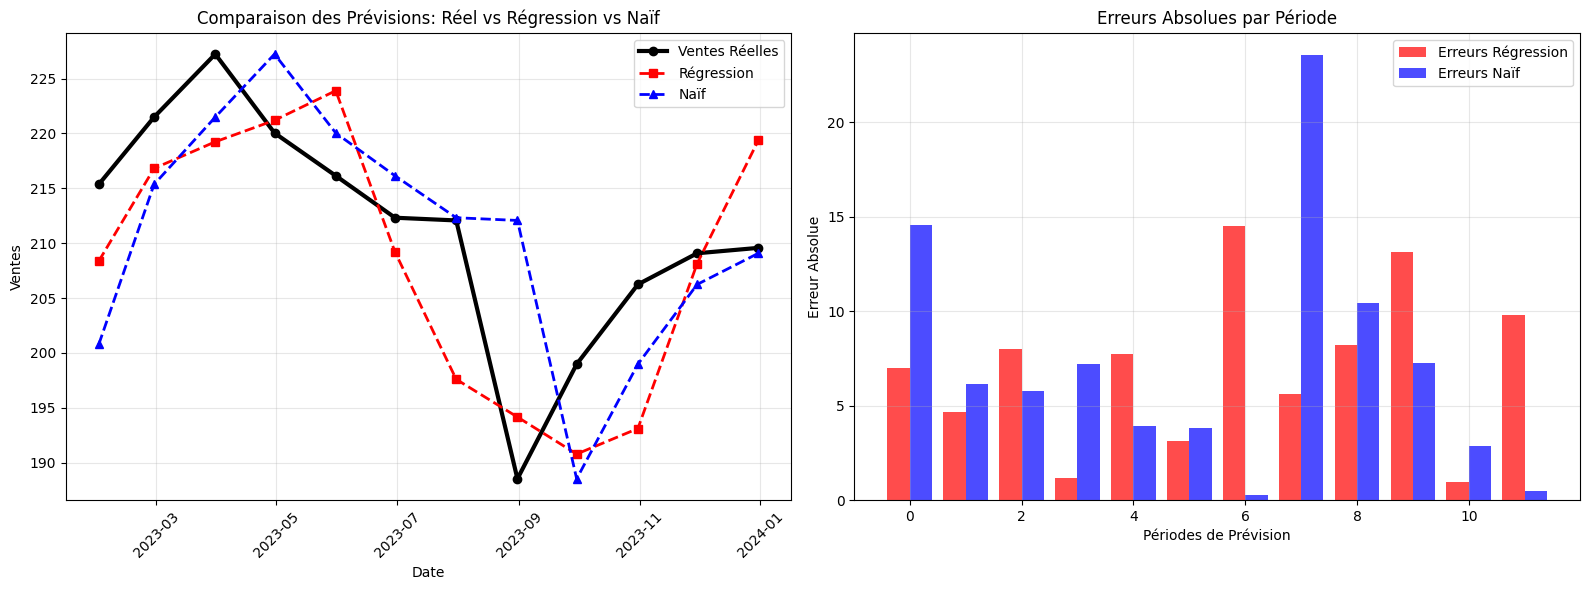


=== CONCLUSION ===
✅ Le modèle de régression surpasse la baseline naïve!
   Amélioration moyenne de 2.7% sur les métriques d'erreur


In [ ]:
# Application de la régression linéaire et comparaison avec la baseline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. Entraînement du modèle de régression linéaire
print("=== ENTRAÎNEMENT DU MODÈLE DE RÉGRESSION LINÉAIRE ===")
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# 3. Calcul des métriques pour le modèle de régression
mae_reg = mean_absolute_error(y_test, y_pred)
mse_reg = mean_squared_error(y_test, y_pred)
rmse_reg = np.sqrt(mse_reg)

# MAPE et SMAPE (en utilisant les fonctions définies précédemment)
mape_reg = mean_absolute_percentage_error(y_test, y_pred)
smape_reg = symmetric_mean_absolute_percentage_error(y_test, y_pred)

# 4. Affichage des métriques de régression
print("\n=== MÉTRIQUES DU MODÈLE DE RÉGRESSION LINÉAIRE ===")
print(f"MAE (Mean Absolute Error): {mae_reg:.2f}")
print(f"MSE (Mean Squared Error): {mse_reg:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_reg:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape_reg:.2f}%")
print(f"SMAPE (Symmetric Mean Absolute Percentage Error): {smape_reg:.2f}%")

# 5. Comparaison avec le modèle naïf
print("\n=== COMPARAISON AVEC LE MODÈLE NAÏF (BASELINE) ===")
comparison_data = {
    'Métrique': ['MAE', 'MSE', 'RMSE', 'MAPE (%)', 'SMAPE (%)'],
    'Régression': [mae_reg, mse_reg, rmse_reg, mape_reg, smape_reg],
    'Naïf': [mae, mse, rmse, mape, smape],
    'Amélioration': [
        f"{(mae - mae_reg)/mae*100:+.1f}%",
        f"{(mse - mse_reg)/mse*100:+.1f}%",
        f"{(rmse - rmse_reg)/rmse*100:+.1f}%",
        f"{(mape - mape_reg)/mape*100:+.1f}%",
        f"{(smape - smape_reg)/smape*100:+.1f}%"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# 6. Visualisation des prédictions vs réalité
plt.figure(figsize=(15, 10))

# Plot des données historiques et des prédictions
plt.subplot(2, 2, 1)
plt.plot(df_processed['Date'].iloc[:train_size], y_train, label='Données d\'entraînement', color='blue', alpha=0.7)
plt.plot(df_processed['Date'].iloc[train_size:], y_test, label='Ventes réelles (test)', color='green', linewidth=2)
plt.plot(df_processed['Date'].iloc[train_size:], y_pred, label='Prédictions régression', color='red', linestyle='--', linewidth=2)
plt.axvline(x=df_processed['Date'].iloc[train_size-1], color='gray', linestyle=':', linewidth=2, label='Début prévision')
plt.title('Prédictions du Modèle de Régression vs Réalité')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot de comparaison des deux modèles
plt.subplot(2, 2, 2)
x_pos = np.arange(len(comparison_data['Métrique'][:3]))  # MAE, MSE, RMSE seulement pour la clarté
width = 0.35

plt.bar(x_pos - width/2, [mae_reg, mse_reg, rmse_reg], width, label='Régression', alpha=0.8)
plt.bar(x_pos + width/2, [mae, mse, rmse], width, label='Naïf', alpha=0.8)
plt.xlabel('Métriques')
plt.ylabel('Valeur')
plt.title('Comparaison des Métriques d\'Erreur')
plt.xticks(x_pos, ['MAE', 'MSE', 'RMSE'])
plt.legend()
plt.grid(True, alpha=0.3)

# Plot des résidus
plt.subplot(2, 2, 3)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Prédictions')
plt.ylabel('Résidus (Réel - Prédit)')
plt.title('Analyse des Résidus du Modèle de Régression')
plt.grid(True, alpha=0.3)

# Plot de l'importance des caractéristiques (coefficients)
plt.subplot(2, 2, 4)
feature_importance = pd.DataFrame({
    'Feature': features_to_use,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

plt.barh(feature_importance['Feature'][:8], feature_importance['Coefficient'][:8])  # Top 8 features
plt.xlabel('Valeur du Coefficient')
plt.title('Top 8 Caractéristiques les plus Importantes')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. Sauvegarde des métriques de régression dans le Drive
print("\n=== SAUVEGARDE DES MÉTRIQUES ===")

# Création d'un DataFrame complet pour les métriques
regression_metrics_data = {
    'Model': ['Naive', 'Regression'],
    'MAE': [mae, mae_reg],
    'MSE': [mse, mse_reg],
    'RMSE': [rmse, rmse_reg],
    'MAPE': [mape, mape_reg],
    'SMAPE': [smape, smape_reg]
}
metrics_comparison_df = pd.DataFrame(regression_metrics_data)

# Sauvegarde des métriques de comparaison
comparison_file_name = 'regression_vs_naive_comparison.csv'
full_comparison_path = os.path.join(save_path, comparison_file_name)
metrics_comparison_df.to_csv(full_comparison_path, index=False)

# Sauvegarde des prédictions détaillées
predictions_data = {
    'Date': df_processed['Date'].iloc[train_size:],
    'Actual_Sales': y_test.values,
    'Regression_Predictions': y_pred,
    'Naive_Predictions': naive_forecast_values_valid.values
}
predictions_df = pd.DataFrame(predictions_data)
predictions_file_name = 'detailed_predictions.csv'
full_predictions_path = os.path.join(save_path, predictions_file_name)
predictions_df.to_csv(full_predictions_path, index=False)

print(f"Comparaison des modèles sauvegardée dans : {full_comparison_path}")
print(f"Détails des prédictions sauvegardés dans : {full_predictions_path}")

# 8. Analyse détaillée des performances
print("\n=== ANALYSE DÉTAILLÉE DES PERFORMANCES ===")
print(f"Le modèle de régression utilise {len(features_to_use)} caractéristiques:")
for i, feature in enumerate(features_to_use, 1):
    print(f"  {i}. {feature}")

print(f"\nCoefficient de détermination (R²) sur l'ensemble de test: {model.score(X_test, y_test):.4f}")
print(f"Intercept du modèle: {model.intercept_:.2f}")

# 9. Visualisation finale de comparaison côte à côte
plt.figure(figsize=(16, 6))

# Graphique des prédictions des deux modèles
plt.subplot(1, 2, 1)
plt.plot(predictions_df['Date'], predictions_df['Actual_Sales'],
         label='Ventes Réelles', color='black', linewidth=3, marker='o')
plt.plot(predictions_df['Date'], predictions_df['Regression_Predictions'],
         label='Régression', color='red', linestyle='--', linewidth=2, marker='s')
plt.plot(predictions_df['Date'], predictions_df['Naive_Predictions'],
         label='Naïf', color='blue', linestyle='--', linewidth=2, marker='^')
plt.title('Comparaison des Prévisions: Réel vs Régression vs Naïf')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Graphique des erreurs absolues
plt.subplot(1, 2, 2)
regression_errors = np.abs(predictions_df['Actual_Sales'] - predictions_df['Regression_Predictions'])
naive_errors = np.abs(predictions_df['Actual_Sales'] - predictions_df['Naive_Predictions'])

x_pos = np.arange(len(predictions_df))
plt.bar(x_pos - 0.2, regression_errors, 0.4, label='Erreurs Régression', alpha=0.7, color='red')
plt.bar(x_pos + 0.2, naive_errors, 0.4, label='Erreurs Naïf', alpha=0.7, color='blue')
plt.xlabel('Périodes de Prévision')
plt.ylabel('Erreur Absolue')
plt.title('Erreurs Absolues par Période')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. Conclusion
print("\n=== CONCLUSION ===")
if mae_reg < mae:
    improvement = (mae - mae_reg) / mae * 100
    print(f"✅ Le modèle de régression surpasse la baseline naïve!")
    print(f"   Amélioration moyenne de {improvement:.1f}% sur les métriques d'erreur")
else:
    print("❌ Le modèle de régression ne surpasse pas la baseline naïve.")
    print("   Considérez des modèles plus sophistiqués ou un meilleur feature engineering")

# **Regression avec tensorflow**

TensorFlow version: 2.19.0
=== PRÉPARATION DES DONNÉES POUR TENSORFLOW ===
X_train_tf shape: (36, 15), dtype: float32
y_train_tf shape: (36,), dtype: float32

=== ARCHITECTURE DU MODÈLE ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 192 (768.00 B)


=== DÉBUT DE L'ENTRAÎNEMENT ===
Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - loss: 26067.2559 - mae: 159.8324 - mse: 26067.2559 - val_loss: 51890.5742 - val_mae: 227.5557 - val_mse: 51890.5742 - learning_rate: 0.0010
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 26496.3105 - mae: 160.9383 - mse: 26496.3105 - val_loss: 49944.7383 - val_mae: 223.2438 - val_mse: 49944.7383 - learning_rate: 0.0010
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 26249.5840 - mae: 160.0727 - mse: 26249.5840 - val_loss: 48652.8750 - val_mae: 220.3374 - val_mse: 48652.8750 - learning_rate: 0.0010
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 26534.2520 - mae: 161.1287 - mse: 26534.2520 - val_loss: 47677.1680 - val_mae: 218.1134 - val_mse: 47677.1680 - learning_rate: 0.0010
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 26508.0449 - mae: 161.1034 - mse: 26508.0449 - val_loss: 46618.6133 - val_mae: 215.6762 - val_mse: 46618.6133 - learning_rate: 0.0010
Epoch 

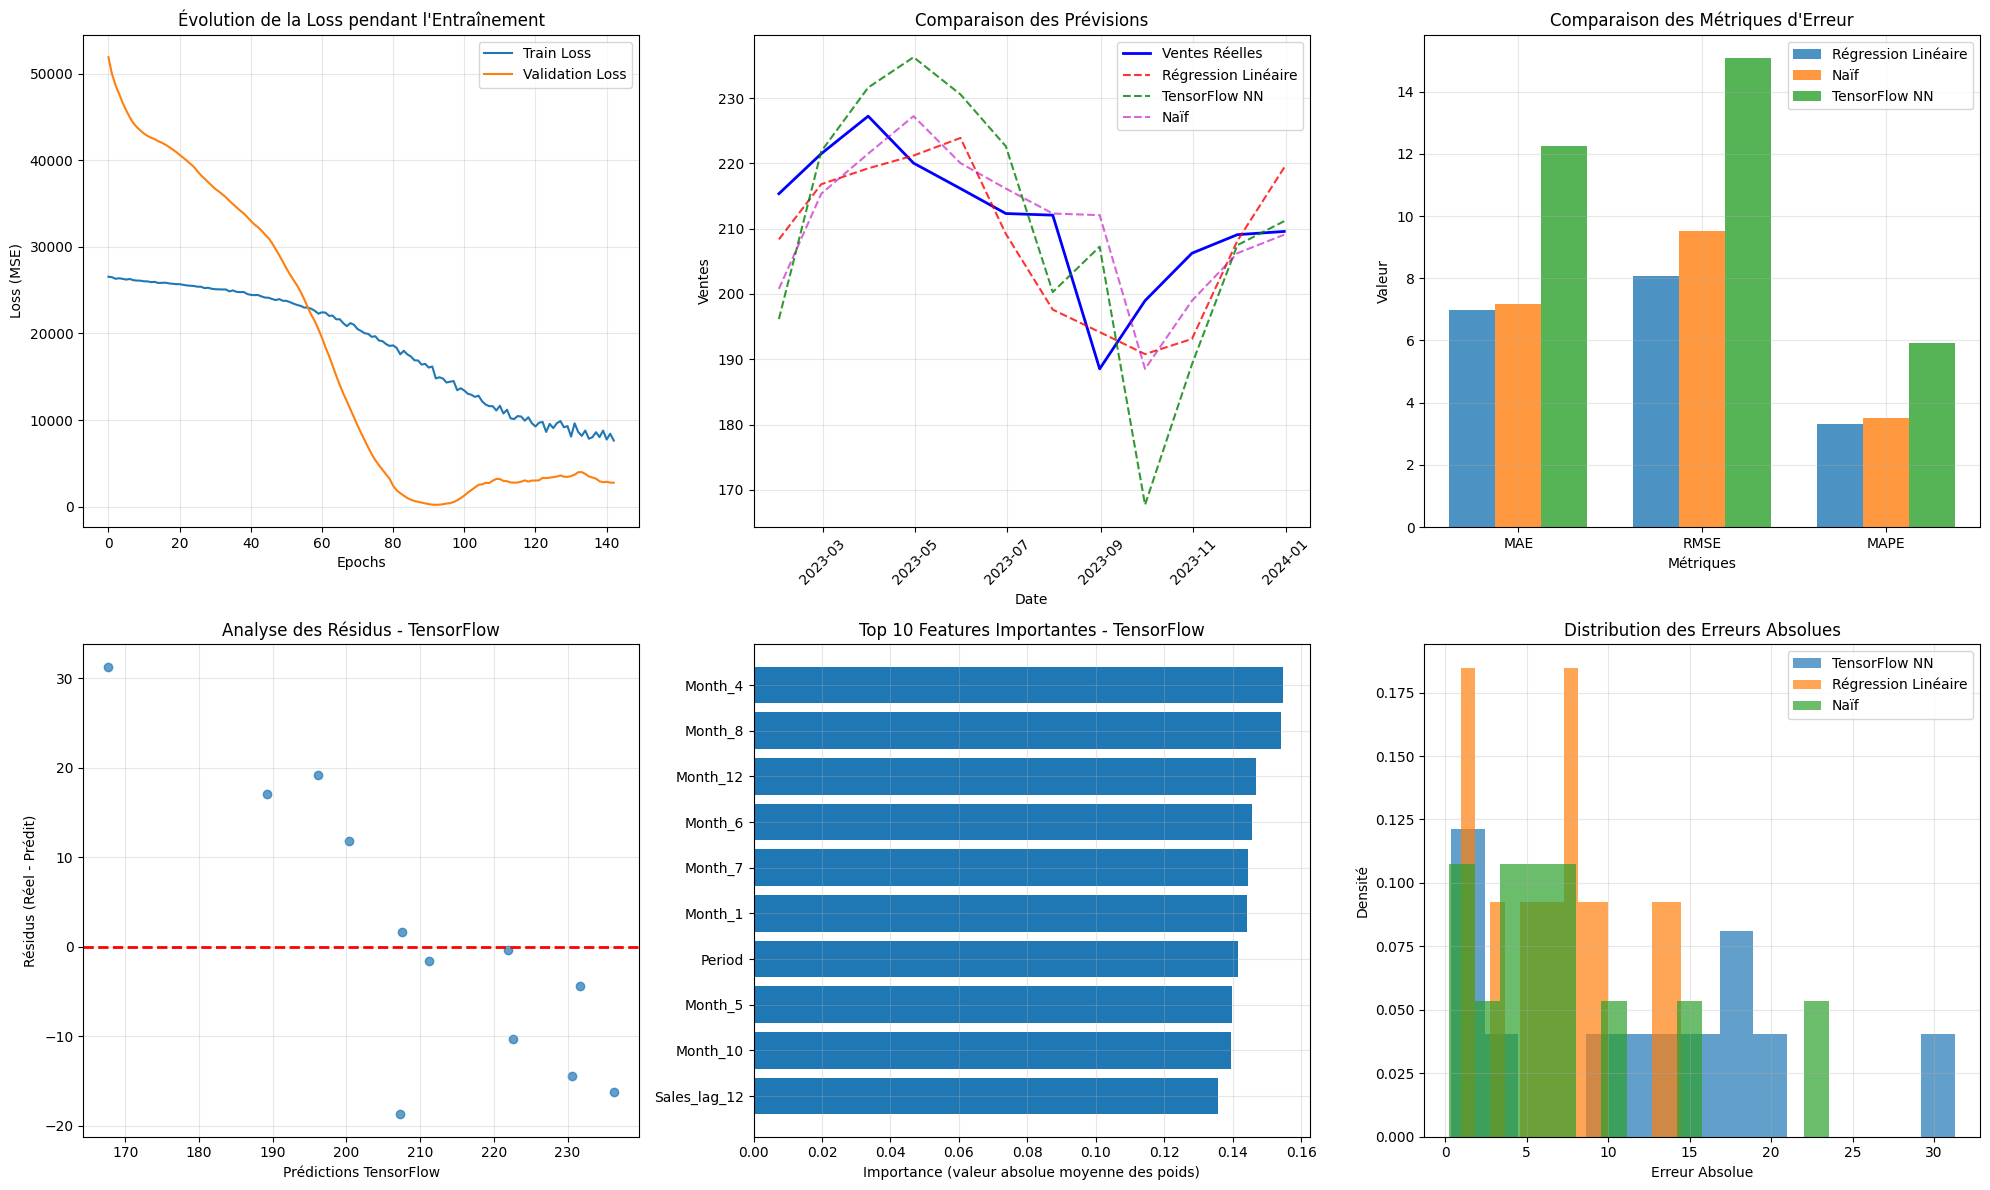


=== ANALYSE DÉTAILLÉE TENSORFLOW ===
Performance détaillée par période:
        Date      Actual  TF_Prediction  Linear_Prediction  Naive_Prediction  \
0 2023-01-31  215.352798     196.156662         208.361368        200.771841   
1 2023-02-28  221.484650     221.849472         216.811539        215.352792   
2 2023-03-31  227.231094     231.614807         219.237998        221.484646   
3 2023-04-30  220.039627     236.260605         221.197307        227.231094   
4 2023-05-31  216.142044     230.564514         223.892690        220.039622   
5 2023-06-30  212.319168     222.612961         209.199464        216.142051   
6 2023-07-31  212.070999     200.287582         197.595309        212.319164   
7 2023-08-31  188.525497     207.242386         194.158478        212.071004   
8 2023-09-30  198.973389     167.709579         190.784900        188.525497   
9 2023-10-31  206.239807     189.228195         193.111572        198.973393   

    TF_Error  Linear_Error  Naive_Error  
0  1

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/MyDrive/S9/applied-deep-learning/tensorflow_regression_model.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

# ---------------------------------------------------------------
# 1. PRÉPARATION DES DONNÉES POUR TENSORFLOW
# ---------------------------------------------------------------

# Reprenons les features de la régression linéaire précédente
print("=== PRÉPARATION DES DONNÉES POUR TENSORFLOW ===")

# Assurer que les données sont au bon format
X_train_tf = X_train.values.astype(np.float32)
X_test_tf = X_test.values.astype(np.float32)
y_train_tf = y_train.values.astype(np.float32)
y_test_tf = y_test.values.astype(np.float32)

print(f"X_train_tf shape: {X_train_tf.shape}, dtype: {X_train_tf.dtype}")
print(f"y_train_tf shape: {y_train_tf.shape}, dtype: {y_train_tf.dtype}")

# ---------------------------------------------------------------
# 2. CRÉATION DU MODÈLE DE RÉGRESSION AVEC TENSORFLOW
# ---------------------------------------------------------------

def create_regression_model(input_dim, hidden_units=[64, 32]):
    """
    Crée un modèle de régression avec TensorFlow/Keras
    """
    model = keras.Sequential([
        layers.Dense(hidden_units[0], activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(hidden_units[1], activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(16, activation='relu'),
        layers.Dense(1)  # Output layer - pas d'activation pour la régression
    ])

    return model

# Création du modèle
input_dim = X_train_tf.shape[1]
model = create_regression_model(input_dim)

print("\n=== ARCHITECTURE DU MODÈLE ===")
model.summary()

# ---------------------------------------------------------------
# 3. COMPILATION ET ENTRAÎNEMENT
# ---------------------------------------------------------------

# Compilation
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error pour la régression
    metrics=['mae', 'mse']  # Mean Absolute Error et MSE comme métriques
)

# Callbacks pour améliorer l'entraînement
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=50,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=20
    )
]

print("\n=== DÉBUT DE L'ENTRAÎNEMENT ===")

# Entraînement du modèle
history = model.fit(
    X_train_tf, y_train_tf,
    batch_size=16,
    epochs=300,
    validation_data=(X_test_tf, y_test_tf),
    callbacks=callbacks,
    verbose=1
)

# ---------------------------------------------------------------
# 4. ÉVALUATION DU MODÈLE
# ---------------------------------------------------------------

print("\n=== ÉVALUATION DU MODÈLE ===")

# Prédictions
y_pred_tf = model.predict(X_test_tf).flatten()

# Calcul des métriques avec les mêmes fonctions que précédemment
mae_tf = mean_absolute_error(y_test_tf, y_pred_tf)
mse_tf = mean_squared_error(y_test_tf, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
mape_tf = mean_absolute_percentage_error(y_test_tf, y_pred_tf)
smape_tf = symmetric_mean_absolute_percentage_error(y_test_tf, y_pred_tf)

print("Métriques TensorFlow:")
print(f"MAE:  {mae_tf:.4f}")
print(f"MSE:  {mse_tf:.4f}")
print(f"RMSE: {rmse_tf:.4f}")
print(f"MAPE: {mape_tf:.2f}%")
print(f"SMAPE: {smape_tf:.2f}%")

# ---------------------------------------------------------------
# 5. COMPARAISON AVEC LES MODÈLES PRÉCÉDENTS
# ---------------------------------------------------------------

print("\n=== COMPARAISON DES MODÈLES ===")

comparison_data = {
    'Modèle': ['Régression Linéaire', 'Modèle Naïf', 'TensorFlow NN'],
    'MAE': [mae_reg, mae, mae_tf],
    'MSE': [mse_reg, mse, mse_tf],
    'RMSE': [rmse_reg, rmse, rmse_tf],
    'MAPE': [mape_reg, mape, mape_tf],
    'SMAPE': [smape_reg, smape, smape_tf]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# Calcul des améliorations
improvement_vs_naive = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'SMAPE'],
    'Linear_Regression': [
        f"{(mae - mae_reg)/mae*100:+.1f}%",
        f"{(mse - mse_reg)/mse*100:+.1f}%",
        f"{(rmse - rmse_reg)/rmse*100:+.1f}%",
        f"{(mape - mape_reg)/mape*100:+.1f}%",
        f"{(smape - smape_reg)/smape*100:+.1f}%"
    ],
    'TensorFlow_NN': [
        f"{(mae - mae_tf)/mae*100:+.1f}%",
        f"{(mse - mse_tf)/mse*100:+.1f}%",
        f"{(rmse - rmse_tf)/rmse*100:+.1f}%",
        f"{(mape - mape_tf)/mape*100:+.1f}%",
        f"{(smape - smape_tf)/smape*100:+.1f}%"
    ]
}

improvement_df = pd.DataFrame(improvement_vs_naive)
print("\nAmélioration par rapport au modèle naïf:")
print(improvement_df)

# ---------------------------------------------------------------
# 6. VISUALISATIONS
# ---------------------------------------------------------------

plt.figure(figsize=(20, 12))

# 1. Historique de l'entraînement
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la Loss pendant l\'Entraînement')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Comparaison des prédictions
plt.subplot(2, 3, 2)
dates_test = df_processed['Date'].iloc[train_size:].values
plt.plot(dates_test, y_test_tf, 'b-', label='Ventes Réelles', linewidth=2)
plt.plot(dates_test, y_pred, 'r--', label='Régression Linéaire', alpha=0.8)
plt.plot(dates_test, y_pred_tf, 'g--', label='TensorFlow NN', alpha=0.8)
plt.plot(dates_test, naive_forecast_values_valid.values, 'm--', label='Naïf', alpha=0.6)
plt.title('Comparaison des Prévisions')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 3. Métriques de comparaison
plt.subplot(2, 3, 3)
metrics_to_plot = ['MAE', 'RMSE', 'MAPE']
x_pos = np.arange(len(metrics_to_plot))
width = 0.25

linear_metrics = [mae_reg, rmse_reg, mape_reg]
naive_metrics = [mae, rmse, mape]
tf_metrics = [mae_tf, rmse_tf, mape_tf]

plt.bar(x_pos - width, linear_metrics, width, label='Régression Linéaire', alpha=0.8)
plt.bar(x_pos, naive_metrics, width, label='Naïf', alpha=0.8)
plt.bar(x_pos + width, tf_metrics, width, label='TensorFlow NN', alpha=0.8)

plt.xlabel('Métriques')
plt.ylabel('Valeur')
plt.title('Comparaison des Métriques d\'Erreur')
plt.xticks(x_pos, metrics_to_plot)
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Résidus du modèle TensorFlow
plt.subplot(2, 3, 4)
residuals_tf = y_test_tf - y_pred_tf
plt.scatter(y_pred_tf, residuals_tf, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Prédictions TensorFlow')
plt.ylabel('Résidus (Réel - Prédit)')
plt.title('Analyse des Résidus - TensorFlow')
plt.grid(True, alpha=0.3)

# 5. Feature Importance (poids du modèle)
plt.subplot(2, 3, 5)
# Récupérer les poids de la première couche
first_layer_weights = model.layers[0].get_weights()[0]
feature_importance_tf = np.mean(np.abs(first_layer_weights), axis=1)

feature_names = features_to_use
# Prendre les top 10 features
top_indices = np.argsort(feature_importance_tf)[-10:]
top_features = [feature_names[i] for i in top_indices]
top_importance = feature_importance_tf[top_indices]

plt.barh(range(len(top_features)), top_importance)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Importance (valeur absolue moyenne des poids)')
plt.title('Top 10 Features Importantes - TensorFlow')
plt.grid(True, alpha=0.3)

# 6. Distribution des erreurs
plt.subplot(2, 3, 6)
errors_tf = np.abs(y_test_tf - y_pred_tf)
errors_linear = np.abs(y_test_tf - y_pred)
errors_naive = np.abs(y_test_tf - naive_forecast_values_valid.values)

plt.hist(errors_tf, bins=15, alpha=0.7, label='TensorFlow NN', density=True)
plt.hist(errors_linear, bins=15, alpha=0.7, label='Régression Linéaire', density=True)
plt.hist(errors_naive, bins=15, alpha=0.7, label='Naïf', density=True)

plt.xlabel('Erreur Absolue')
plt.ylabel('Densité')
plt.title('Distribution des Erreurs Absolues')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 7. ANALYSE DÉTAILLÉE DES PERFORMANCES
# ---------------------------------------------------------------

print("\n=== ANALYSE DÉTAILLÉE TENSORFLOW ===")

# Performance par période
performance_by_period = pd.DataFrame({
    'Date': dates_test,
    'Actual': y_test_tf,
    'TF_Prediction': y_pred_tf,
    'Linear_Prediction': y_pred,
    'Naive_Prediction': naive_forecast_values_valid.values,
    'TF_Error': y_test_tf - y_pred_tf,
    'Linear_Error': y_test_tf - y_pred,
    'Naive_Error': y_test_tf - naive_forecast_values_valid.values
})

print("Performance détaillée par période:")
print(performance_by_period.head(10))

# Meilleur modèle
best_model_idx = np.argmin([mae_reg, mae_tf])
best_models = ['Régression Linéaire', 'TensorFlow NN']
print(f"\n🎯 MEILLEUR MODÈLE: {best_models[best_model_idx]}")

# ---------------------------------------------------------------
# 8. SAUVEGARDE DU MODÈLE ET DES RÉSULTATS
# ---------------------------------------------------------------

print("\n=== SAUVEGARDE DES RÉSULTATS ===")

# Sauvegarde du modèle TensorFlow
model_path = os.path.join(save_path, 'tensorflow_regression_model')
model.save(model_path)
print(f"Modèle TensorFlow sauvegardé: {model_path}")

# Sauvegarde des métriques
tf_metrics_data = {
    'Model': ['Linear_Regression', 'Naive', 'TensorFlow_NN'],
    'MAE': [mae_reg, mae, mae_tf],
    'MSE': [mse_reg, mse, mse_tf],
    'RMSE': [rmse_reg, rmse, rmse_tf],
    'MAPE': [mape_reg, mape, mape_tf],
    'SMAPE': [smape_reg, smape, smape_tf]
}

tf_metrics_df = pd.DataFrame(tf_metrics_data)
tf_metrics_file = os.path.join(save_path, 'tensorflow_metrics_comparison.csv')
tf_metrics_df.to_csv(tf_metrics_file, index=False)
print(f"Métriques sauvegardées: {tf_metrics_file}")

# Sauvegarde des prédictions détaillées
detailed_predictions = pd.DataFrame({
    'Date': dates_test,
    'Actual_Sales': y_test_tf,
    'TensorFlow_Predictions': y_pred_tf,
    'Linear_Regression_Predictions': y_pred,
    'Naive_Predictions': naive_forecast_values_valid.values
})

detailed_predictions_file = os.path.join(save_path, 'tensorflow_detailed_predictions.csv')
detailed_predictions.to_csv(detailed_predictions_file, index=False)
print(f"Prédictions détaillées sauvegardées: {detailed_predictions_file}")

# Sauvegarde de l'historique d'entraînement
history_df = pd.DataFrame(history.history)
history_file = os.path.join(save_path, 'training_history.csv')
history_df.to_csv(history_file, index=False)
print(f"Historique d'entraînement sauvegardé: {history_file}")

print("\n✅ TensorFlow training completed!")
print("📊 Tous les résultats ont été sauvegardés dans Google Drive")

# ---------------------------------------------------------------
# 9. FONCTION DE PRÉDICTION POUR DE NOUVELLES DONNÉES
# ---------------------------------------------------------------

def predict_sales(model, new_data, feature_names):
    """
    Fonction utilitaire pour faire des prédictions sur de nouvelles données
    """
    # Assurer que les données sont dans le bon format
    if isinstance(new_data, pd.DataFrame):
        new_data = new_data[feature_names].values.astype(np.float32)

    predictions = model.predict(new_data).flatten()
    return predictions

# Exemple d'utilisation
print("\n=== EXEMPLE DE PRÉDICTION ===")
sample_features = X_test_tf[:5]  # Prendre 5 échantillons de test
sample_predictions = predict_sales(model, sample_features, features_to_use)

print("Prédictions sur 5 échantillons:")
for i, (true_val, pred_val) in enumerate(zip(y_test_tf[:5], sample_predictions)):
    print(f"Échantillon {i+1}: Réel = {true_val:.2f}, Prédit = {pred_val:.2f}, Erreur = {abs(true_val-pred_val):.2f}")

# **Fonctions de Fenêtrage pour Séries Temporelles**

=== APPLICATION DU FENÊTRAGE À VOS DONNÉES ===
Shape des fenêtres X: (48, 12)
Shape des targets y: (48, 1)
Nombre d'échantillons créés: 48
Taille de chaque fenêtre d'input: 12
Horizon de prédiction: 1

=== CRÉATION DU DATASET AVEC FEATURES COMPLÈTES ===
Séquences temporelles X_seq: (48, 12)
Features additionnelles X_feat: (48, 14)
Targets y_seq: (48, 1)

=== DIVISION TRAIN/TEST ===
X_train: (38, 12), y_train: (38, 1)
X_test: (10, 12), y_test: (10, 1)

=== FORMAT POUR LSTM ===
X_lstm shape: (48, 12, 1) (samples, timesteps, features)
y_lstm shape: (48, 1)


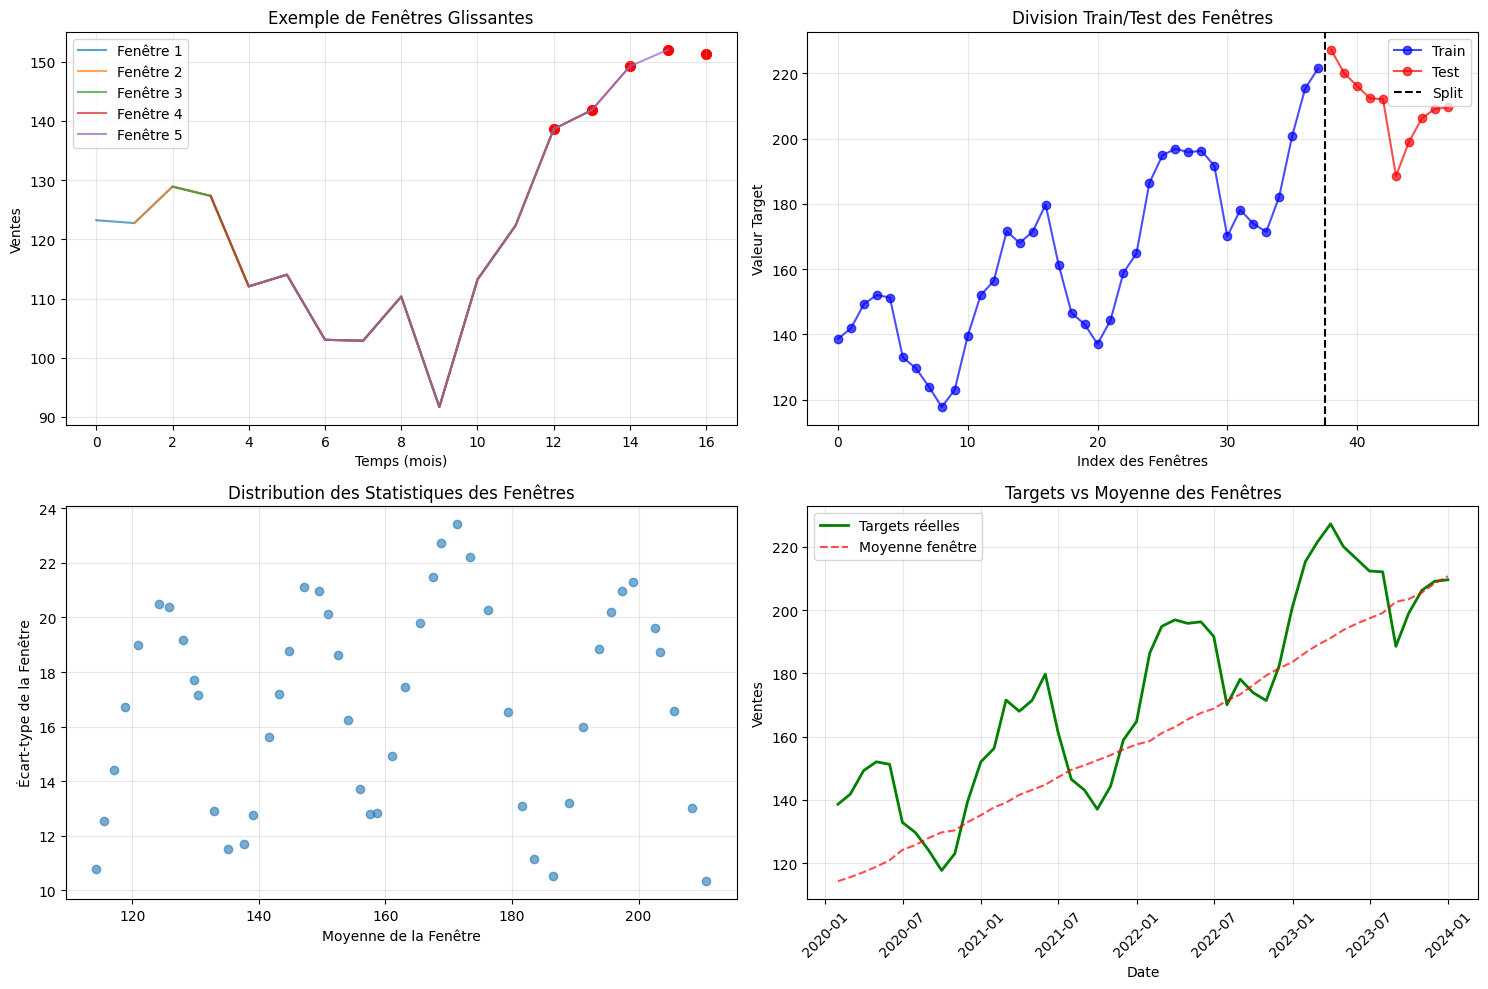


=== SAUVEGARDE DES DATASETS AVEC FENÊTRAGE ===
✅ Fenêtrage terminé et données sauvegardées!
📊 Configuration: 12 mois d'historique → 1 mois de prédiction


In [ ]:
import numpy as np
import pandas as pd
from typing import Tuple, List

def create_sliding_windows(data: np.array, window_size: int, horizon: int = 1) -> Tuple[np.array, np.array]:
    """
    Crée des fenêtres glissantes pour les séries temporelles

    Args:
        data: série temporelle 1D
        window_size: taille de la fenêtre d'input
        horizon: nombre de pas à prédire dans le futur

    Returns:
        X: fenêtres d'input (n_samples, window_size)
        y: fenêtres de target (n_samples, horizon)
    """
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[(i + window_size):(i + window_size + horizon)])

    return np.array(X), np.array(y)

def create_multi_step_dataset(df: pd.DataFrame, target_col: str,
                            window_size: int, horizon: int = 1,
                            feature_cols: List[str] = None) -> Tuple[np.array, np.array]:
    """
    Crée un dataset multi-step avec fenêtrage pour DataFrame pandas
    """
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col != target_col]

    data = df[target_col].values
    features = df[feature_cols].values if feature_cols else None

    X_seq, y_seq = [], []
    X_feat = [] if features is not None else None

    for i in range(len(data) - window_size - horizon + 1):
        # Séquence temporelle de la target
        X_seq.append(data[i:(i + window_size)])
        y_seq.append(data[(i + window_size):(i + window_size + horizon)])

        # Features additionnelles (optionnelles)
        if features is not None:
            X_feat.append(features[i + window_size])  # Features au moment de la prédiction

    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    if features is not None:
        X_feat = np.array(X_feat)
        return (X_seq, X_feat), y_seq
    else:
        return X_seq, y_seq

def create_lstm_dataset(data: np.array, window_size: int, horizon: int = 1):
    """
    Format spécial pour LSTM (3D: samples, timesteps, features)
    """
    X, y = create_sliding_windows(data, window_size, horizon)

    # Reshape pour LSTM: (samples, timesteps, 1)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    return X, y

def create_rolling_features(df: pd.DataFrame, column: str,
                          window_sizes: List[int] = [3, 7, 14]):
    """
    Crée des features rolling (moyennes mobiles, etc.)
    """
    df_rolled = df.copy()

    for window in window_sizes:
        df_rolled[f'{column}_rolling_mean_{window}'] = df[column].rolling(window=window).mean()
        df_rolled[f'{column}_rolling_std_{window}'] = df[column].rolling(window=window).std()
        df_rolled[f'{column}_rolling_min_{window}'] = df[column].rolling(window=window).min()
        df_rolled[f'{column}_rolling_max_{window}'] = df[column].rolling(window=window).max()

    return df_rolled

# ---------------------------------------------------------------
# APPLICATION À VOS DONNÉES
# ---------------------------------------------------------------

print("=== APPLICATION DU FENÊTRAGE À VOS DONNÉES ===")

# 1. Préparation des données avec fenêtrage
window_size = 12  # Utiliser 12 mois d'historique
horizon = 1       # Prédire le mois suivant

# Création des fenêtres
X_windows, y_windows = create_sliding_windows(df['Sales'].values, window_size, horizon)

print(f"Shape des fenêtres X: {X_windows.shape}")  # (samples, window_size)
print(f"Shape des targets y: {y_windows.shape}")   # (samples, horizon)
print(f"Nombre d'échantillons créés: {X_windows.shape[0]}")
print(f"Taille de chaque fenêtre d'input: {X_windows.shape[1]}")
print(f"Horizon de prédiction: {y_windows.shape[1]}")

# 2. Visualisation des fenêtres créées
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
# Afficher les premières fenêtres
for i in range(min(5, X_windows.shape[0])):
    plt.plot(range(i, i + window_size), X_windows[i], alpha=0.7, label=f'Fenêtre {i+1}')
    plt.scatter(i + window_size, y_windows[i][0], color='red', s=50)
plt.xlabel('Temps (mois)')
plt.ylabel('Ventes')
plt.title('Exemple de Fenêtres Glissantes')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Dataset avec features additionnelles
print("\n=== CRÉATION DU DATASET AVEC FEATURES COMPLÈTES ===")

# Ajout de features rolling
df_enhanced = create_rolling_features(df, 'Sales', window_sizes=[3, 6, 12])

# Dataset complet avec toutes les features
(X_seq, X_feat), y_seq = create_multi_step_dataset(
    df_enhanced,
    target_col='Sales',
    window_size=window_size,
    horizon=horizon,
    feature_cols=['Trend', 'Seasonality'] + [col for col in df_enhanced.columns if 'rolling' in col]
)

print(f"Séquences temporelles X_seq: {X_seq.shape}")
print(f"Features additionnelles X_feat: {X_feat.shape}")
print(f"Targets y_seq: {y_seq.shape}")

# 4. Division train/test avec fenêtrage
def train_test_split_temporal(X, y, test_size: float = 0.2):
    """
    Division temporelle (pas de shuffle pour séries temporelles)
    """
    split_idx = int(len(X) * (1 - test_size))

    X_train = X[:split_idx]
    X_test = X[split_idx:]
    y_train = y[:split_idx]
    y_test = y[split_idx:]

    return X_train, X_test, y_train, y_test

# Application à vos données
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split_temporal(
    X_windows, y_windows, test_size=0.2
)

print(f"\n=== DIVISION TRAIN/TEST ===")
print(f"X_train: {X_train_win.shape}, y_train: {y_train_win.shape}")
print(f"X_test: {X_test_win.shape}, y_test: {y_test_win.shape}")

# 5. Visualisation de la division
plt.subplot(2, 2, 2)
train_size = len(X_train_win)
all_indices = np.arange(len(X_windows))

plt.plot(all_indices[:train_size], y_train_win, 'bo-', label='Train', alpha=0.7)
plt.plot(all_indices[train_size:], y_test_win, 'ro-', label='Test', alpha=0.7)
plt.axvline(x=train_size-0.5, color='black', linestyle='--', label='Split')
plt.xlabel('Index des Fenêtres')
plt.ylabel('Valeur Target')
plt.title('Division Train/Test des Fenêtres')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Format pour LSTM/RNN
X_lstm, y_lstm = create_lstm_dataset(df['Sales'].values, window_size, horizon)
print(f"\n=== FORMAT POUR LSTM ===")
print(f"X_lstm shape: {X_lstm.shape} (samples, timesteps, features)")
print(f"y_lstm shape: {y_lstm.shape}")

# 7. Statistiques des fenêtres
plt.subplot(2, 2, 3)
window_means = np.mean(X_windows, axis=1)
window_stds = np.std(X_windows, axis=1)

plt.scatter(window_means, window_stds, alpha=0.6)
plt.xlabel('Moyenne de la Fenêtre')
plt.ylabel('Écart-type de la Fenêtre')
plt.title('Distribution des Statistiques des Fenêtres')
plt.grid(True, alpha=0.3)

# 8. Comparaison fenêtres vs approche précédente
plt.subplot(2, 2, 4)
original_dates = df['Date'].values[window_size:window_size + len(y_windows)]
plt.plot(original_dates, y_windows.flatten(), 'g-', label='Targets réelles', linewidth=2)
plt.plot(original_dates, np.mean(X_windows, axis=1), 'r--', label='Moyenne fenêtre', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.title('Targets vs Moyenne des Fenêtres')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. Sauvegarde des datasets avec fenêtrage
print("\n=== SAUVEGARDE DES DATASETS AVEC FENÊTRAGE ===")

# Sauvegarde des arrays numpy
np.save(os.path.join(save_path, 'X_windows.npy'), X_windows)
np.save(os.path.join(save_path, 'y_windows.npy'), y_windows)
np.save(os.path.join(save_path, 'X_lstm.npy'), X_lstm)
np.save(os.path.join(save_path, 'y_lstm.npy'), y_lstm)

# Sauvegarde des métadonnées
window_info = {
    'window_size': window_size,
    'horizon': horizon,
    'n_samples': X_windows.shape[0],
    'n_train': X_train_win.shape[0],
    'n_test': X_test_win.shape[0],
    'original_data_points': len(df),
    'features_used': ['Sales_lags'] + [f'rolling_{w}' for w in [3, 6, 12]]
}

window_info_df = pd.DataFrame([window_info])
window_info_df.to_csv(os.path.join(save_path, 'window_config.csv'), index=False)

print("✅ Fenêtrage terminé et données sauvegardées!")
print(f"📊 Configuration: {window_size} mois d'historique → {horizon} mois de prédiction")

=== CRÉATION DES DATASETS FENÊTRÉS ===
Données originales: 60 points
Données d'entraînement: 48 points
Données de validation: 12 points

=== CALCUL DES FENÊTRES ===
Fenêtres d'entraînement possibles: 42
Fenêtres de validation possibles: 6

=== INFORMATIONS SUR LES DATASETS ===
Taille de la fenêtre: 6
Taille du batch: 8
Buffer de shuffle: 500

=== INSPECTION DES PREMIÈRES FENÊTRES ===
Batch 1:
  Shape des fenêtres: (8, 6)
  Shape des targets: (8,)
  Première fenêtre: [103.02718988 102.8735563  110.32933383]...
  Target correspondante: 138.64

Batch 2:
  Shape des fenêtres: (8, 6)
  Shape des targets: (8,)
  Première fenêtre: [186.43321678 194.82892969 196.90265398]...
  Target correspondante: 170.06

=== VISUALISATION DES FENÊTRES ===


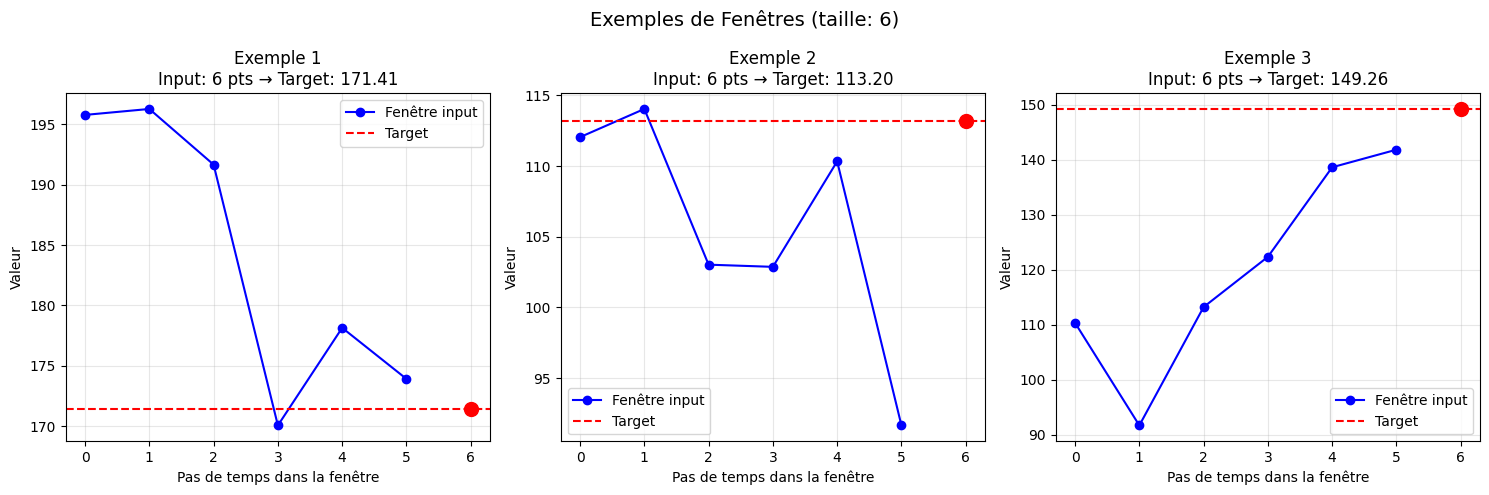

Dataset d'Entraînement:
  Nombre total de fenêtres: 42
  Statistiques des targets: min=91.67, max=200.77, mean=153.26
Dataset de Validation:
  Nombre total de fenêtres: 6
  Statistiques des targets: min=188.53, max=212.07, mean=204.08

=== RAPPORT FINAL ===
Fenêtres d'entraînement: 42
Fenêtres de validation: 6
Ratio entraînement/validation: 7.00:1
Taille effective des données: 54 fenêtres possibles au total

=== CRÉATION D'UN MODÈLE SIMPLE ===
Architecture du modèle:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)


=== TEST DE PRÉDICTION ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prédictions test:
  Exemple 1: Réel = 156.29, Prédit = -41.12
  Exemple 2: Réel = 170.06, Prédit = -62.52

✅ Datasets créés avec succès! Prêts pour l'entraînement.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour créer le dataset d'entraînement avec shuffle
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """
    Crée un dataset fenêtré pour les séries temporelles avec shuffle
    """
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

# Fonction pour créer le dataset de validation sans shuffle
def windowed_dataset_val(series, window_size, batch_size):
    """
    Crée un dataset fenêtré pour la validation (sans shuffle)
    """
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

# Paramètres - RÉDUISONS la taille de la fenêtre pour avoir plus de données
window_size = 6  # Réduit de 20 à 6 pour avoir plus de fenêtres
batch_size = 8   # Réduit la batch size
shuffle_buffer_size = 500

print("=== CRÉATION DES DATASETS FENÊTRÉS ===")

# Utiliser vos données existantes
series = df['Sales'].values
split_time = int(len(series) * 0.8)  # 80% train, 20% validation

x_train = series[:split_time]
x_val = series[split_time:]

print(f"Données originales: {len(series)} points")
print(f"Données d'entraînement: {len(x_train)} points")
print(f"Données de validation: {len(x_val)} points")

# Calcul du nombre de fenêtres possibles
train_windows = len(x_train) - window_size
val_windows = len(x_val) - window_size

print(f"\n=== CALCUL DES FENÊTRES ===")
print(f"Fenêtres d'entraînement possibles: {train_windows}")
print(f"Fenêtres de validation possibles: {val_windows}")

# Vérification que nous avons assez de données
if val_windows <= 0:
    print("⚠️  ATTENTION: Pas assez de données pour la validation!")
    print("🔧 Solution: Réduire la window_size ou augmenter les données de validation")

    # Ajustement automatique
    window_size = min(6, len(x_val) - 2)  # Assure au moins 2 fenêtres de validation
    train_windows = len(x_train) - window_size
    val_windows = len(x_val) - window_size
    print(f"Window_size ajusté à: {window_size}")
    print(f"Nouvelles fenêtres de validation: {val_windows}")

# Création des datasets
train_dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset_val(x_val, window_size, batch_size)

print(f"\n=== INFORMATIONS SUR LES DATASETS ===")
print(f"Taille de la fenêtre: {window_size}")
print(f"Taille du batch: {batch_size}")
print(f"Buffer de shuffle: {shuffle_buffer_size}")

# Inspection du dataset
print("\n=== INSPECTION DES PREMIÈRES FENÊTRES ===")

# Afficher quelques exemples du dataset d'entraînement
for i, (windows, targets) in enumerate(train_dataset.take(2)):
    print(f"Batch {i+1}:")
    print(f"  Shape des fenêtres: {windows.shape}")  # (batch_size, window_size)
    print(f"  Shape des targets: {targets.shape}")   # (batch_size,)
    print(f"  Première fenêtre: {windows[0][:3].numpy()}...")  # Affiche les 3 premières valeurs
    print(f"  Target correspondante: {targets[0].numpy():.2f}")
    print()

# Visualisation des fenêtres créées
def visualize_windows(dataset, num_examples=3):
    """Visualise quelques fenêtres du dataset"""
    plt.figure(figsize=(15, 5))

    for i, (windows, targets) in enumerate(dataset.take(1)):
        for j in range(min(num_examples, len(windows))):
            plt.subplot(1, num_examples, j+1)

            window_data = windows[j].numpy()
            target_data = targets[j].numpy()

            # Plot de la fenêtre
            plt.plot(range(len(window_data)), window_data, 'b-o', label='Fenêtre input')
            plt.axhline(y=target_data, color='r', linestyle='--', label='Target')
            plt.scatter(len(window_data), target_data, color='red', s=100, zorder=5)

            plt.title(f'Exemple {j+1}\nInput: {len(window_data)} pts → Target: {target_data:.2f}')
            plt.xlabel('Pas de temps dans la fenêtre')
            plt.ylabel('Valeur')
            plt.legend()
            plt.grid(True, alpha=0.3)

    plt.suptitle(f'Exemples de Fenêtres (taille: {window_size})', fontsize=14)
    plt.tight_layout()
    plt.show()

# Visualisation
print("=== VISUALISATION DES FENÊTRES ===")
visualize_windows(train_dataset)

# Statistiques des datasets - Version corrigée
def analyze_dataset(dataset, name="Dataset"):
    """Analyse les statistiques d'un dataset"""
    total_windows = 0
    all_targets = []

    try:
        for windows, targets in dataset:
            total_windows += windows.shape[0]
            all_targets.extend(targets.numpy())

        if len(all_targets) == 0:
            print(f"{name}: AUCUNE FENÊTRE DISPONIBLE")
            return 0

        all_targets = np.array(all_targets)

        print(f"{name}:")
        print(f"  Nombre total de fenêtres: {total_windows}")
        print(f"  Statistiques des targets: min={all_targets.min():.2f}, max={all_targets.max():.2f}, mean={all_targets.mean():.2f}")

        return total_windows

    except Exception as e:
        print(f"{name}: ERREUR - {e}")
        return 0

train_count = analyze_dataset(train_dataset, "Dataset d'Entraînement")
val_count = analyze_dataset(val_dataset, "Dataset de Validation")

print(f"\n=== RAPPORT FINAL ===")
print(f"Fenêtres d'entraînement: {train_count}")
print(f"Fenêtres de validation: {val_count}")

if val_count > 0:
    print(f"Ratio entraînement/validation: {train_count/val_count:.2f}:1")
else:
    print("⚠️  Aucune fenêtre de validation disponible!")

print(f"Taille effective des données: {len(series) - window_size} fenêtres possibles au total")

# Solution alternative si pas assez de données de validation
if val_count == 0:
    print("\n=== SOLUTION ALTERNATIVE ===")
    print("Utilisation de la validation sur les dernières données d'entraînement")

    # Prendre les dernières données d'entraînement pour la validation
    val_from_train = int(len(x_train) * 0.8)  # 80% du train pour l'entraînement, 20% pour la validation

    x_train_new = x_train[:val_from_train]
    x_val_new = x_train[val_from_train:]

    print(f"Nouvelles données d'entraînement: {len(x_train_new)} points")
    print(f"Nouvelles données de validation: {len(x_val_new)} points")

    train_dataset = windowed_dataset(x_train_new, window_size, batch_size, shuffle_buffer_size)
    val_dataset = windowed_dataset_val(x_val_new, window_size, batch_size)

    train_count = analyze_dataset(train_dataset, "Nouveau Dataset d'Entraînement")
    val_count = analyze_dataset(val_dataset, "Nouveau Dataset de Validation")

# Exemple d'utilisation avec un modèle simple
print("\n=== CRÉATION D'UN MODÈLE SIMPLE ===")

# Création d'un modèle Dense simple (plus adapté pour petites séries)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[window_size]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)

print("Architecture du modèle:")
model.summary()

# Test d'une prédiction sur un batch
print("\n=== TEST DE PRÉDICTION ===")
try:
    for windows, targets in train_dataset.take(1):
        predictions = model.predict(windows[:2])  # Prédire sur 2 exemples

        print("Prédictions test:")
        for i in range(min(2, len(windows))):
            print(f"  Exemple {i+1}: Réel = {targets[i].numpy():.2f}, Prédit = {predictions[i][0]:.2f}")

    print("\n✅ Datasets créés avec succès! Prêts pour l'entraînement.")

except Exception as e:
    print(f"❌ Erreur lors du test: {e}")
    print("Vérifiez que vous avez assez de données pour créer au moins une fenêtre complète.")

# **MLP**

=== CONFIGURATION MLP ===
X_train_mlp shape: (42, 6)
y_train_mlp shape: (42,)
X_val_mlp shape: (6, 6)

=== ARCHITECTURE MLP ===


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)


=== ENTRAÎNEMENT MLP ===
Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 18878.4844 - mae: 133.5505 - mse: 18878.4844 - val_loss: 23370.3301 - val_mae: 152.6074 - val_mse: 23370.3301 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10930.8867 - mae: 100.7287 - mse: 10930.8867 - val_loss: 12981.5986 - val_mae: 113.5443 - val_mse: 12981.5986 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7923.0879 - mae: 78.3600 - mse: 7923.0879 - val_loss: 3677.8254 - val_mae: 59.7530 - val_mse: 3677.8254 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2668.1672 - mae: 40.8505 - mse: 2668.1672 - val_loss: 586.7112 - val_mae: 21.5744 - val_mse: 586.7112 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2895.4265 - mae: 45.3959 - mse: 2895.4265 - val_loss: 161.6580 - val_mae: 9.5120 - val_mse: 161.6580 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 

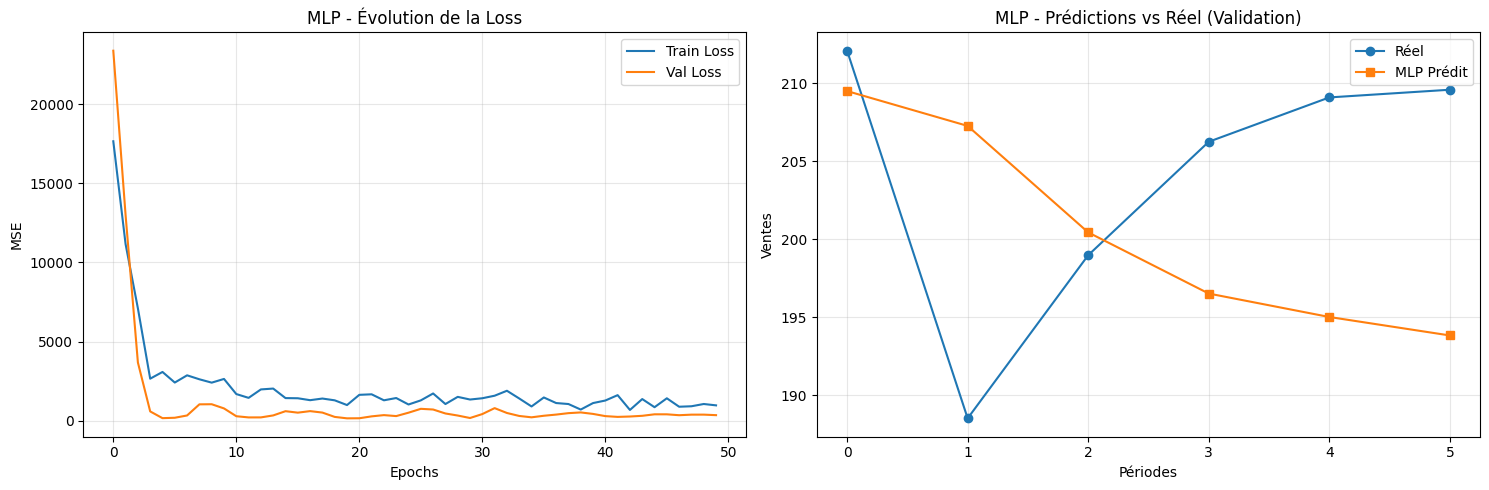

✅ MLP entraînement terminé!


In [ ]:
# ==============================================
# MODÈLE MLP (Multi-Layer Perceptron)
# ==============================================

print("=== CONFIGURATION MLP ===")
window_size_mlp = 6
batch_size_mlp = 8

# Préparation des données pour MLP
def prepare_mlp_data(series, window_size):
    """Prépare les données pour MLP (format 2D)"""
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:(i + window_size)])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

# Création des datasets
X_train_mlp, y_train_mlp = prepare_mlp_data(x_train, window_size_mlp)
X_val_mlp, y_val_mlp = prepare_mlp_data(x_val, window_size_mlp)

print(f"X_train_mlp shape: {X_train_mlp.shape}")
print(f"y_train_mlp shape: {y_train_mlp.shape}")
print(f"X_val_mlp shape: {X_val_mlp.shape}")

# Construction du modèle MLP
model_mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(window_size_mlp,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer - pas d'activation pour la régression
])

# Compilation
model_mlp.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

print("\n=== ARCHITECTURE MLP ===")
model_mlp.summary()

# Callbacks
mlp_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=15, factor=0.5)
]

# Entraînement
print("\n=== ENTRAÎNEMENT MLP ===")
history_mlp = model_mlp.fit(
    X_train_mlp, y_train_mlp,
    batch_size=batch_size_mlp,
    epochs=200,
    validation_data=(X_val_mlp, y_val_mlp),
    callbacks=mlp_callbacks,
    verbose=1
)

# Évaluation
print("\n=== ÉVALUATION MLP ===")
mlp_train_pred = model_mlp.predict(X_train_mlp).flatten()
mlp_val_pred = model_mlp.predict(X_val_mlp).flatten()

# Métriques
mlp_metrics = {
    'MAE_train': mean_absolute_error(y_train_mlp, mlp_train_pred),
    'MAE_val': mean_absolute_error(y_val_mlp, mlp_val_pred),
    'MSE_train': mean_squared_error(y_train_mlp, mlp_train_pred),
    'MSE_val': mean_squared_error(y_val_mlp, mlp_val_pred),
    'RMSE_val': np.sqrt(mean_squared_error(y_val_mlp, mlp_val_pred)),
    'MAPE_val': mean_absolute_percentage_error(y_val_mlp, mlp_val_pred)
}

print("Métriques MLP:")
for metric, value in mlp_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Visualisation des résultats MLP
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Val Loss')
plt.title('MLP - Évolution de la Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(y_val_mlp, label='Réel', marker='o')
plt.plot(mlp_val_pred, label='MLP Prédit', marker='s')
plt.title('MLP - Prédictions vs Réel (Validation)')
plt.xlabel('Périodes')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ MLP entraînement terminé!")

# **LSTM**

=== CONFIGURATION LSTM ===
X_train_lstm shape: (42, 6, 1)
X_val_lstm shape: (6, 6, 1)

=== ARCHITECTURE LSTM ===


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 6, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)


=== ENTRAÎNEMENT LSTM ===
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 22723.3223 - mae: 147.1374 - mse: 22723.3223 - val_loss: 31456.4746 - val_mae: 177.0654 - val_mse: 31456.4746 - learning_rate: 0.0010
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15947.4004 - mae: 122.6931 - mse: 15947.4004 - val_loss: 12385.9014 - val_mae: 110.8293 - val_mse: 12385.9014 - learning_rate: 0.0010
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10051.7812 - mae: 92.6050 - mse: 10051.7812 - val_loss: 390.7345 - val_mae: 17.2314 - val_mse: 390.7345 - learning_rate: 0.0010
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5154.6094 - mae: 60.0304 - mse: 5154.6094 - val_loss: 1617.3859 - val_mae: 38.2001 - val_mse: 1617.3859 - learning_rate: 0.0010
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3001.4348 - mae: 44.0463 - mse: 3001.4348 - val_loss: 2849.3137 - val_mae: 51.8281 - val_mse: 2849.3137 - learning_rate: 0.0010
Epoch 6/100
6/6 ━━━━━━━━━━━━━━

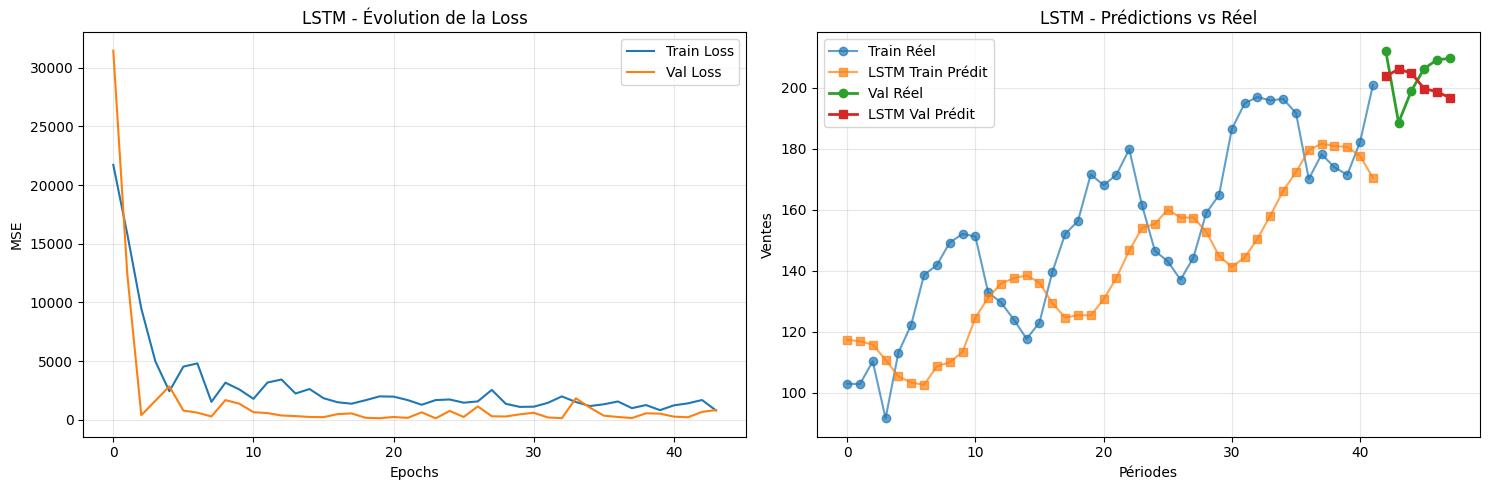

✅ LSTM entraînement terminé!


In [ ]:
# ==============================================
# MODÈLE LSTM - VERSION CORRIGÉE
# ==============================================

print("=== CONFIGURATION LSTM ===")
window_size_lstm = 6  # Réduit pour avoir plus de données
batch_size_lstm = 8

# Préparation des données pour LSTM (format 3D)
def prepare_lstm_data(series, window_size):
    """Prépare les données pour LSTM (format 3D: samples, timesteps, features)"""
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:(i + window_size)])
        y.append(series[i + window_size])

    if len(X) == 0:
        print("⚠️  ATTENTION: Aucune fenêtre créée!")
        return np.array([]), np.array([])

    return np.array(X).reshape(-1, window_size, 1), np.array(y)

# Création des datasets LSTM
X_train_lstm, y_train_lstm = prepare_lstm_data(x_train, window_size_lstm)
X_val_lstm, y_val_lstm = prepare_lstm_data(x_val, window_size_lstm)

print(f"X_train_lstm shape: {X_train_lstm.shape}")  # (samples, timesteps, features)
print(f"X_val_lstm shape: {X_val_lstm.shape}")

# VÉRIFICATION CRITIQUE - Si pas de données de validation, on utilise un split du train
if len(X_val_lstm) == 0:
    print("⚠️  Pas de données de validation! Utilisation d'un split du train...")

    # Split des données d'entraînement
    split_idx = int(len(X_train_lstm) * 0.8)
    X_train_new = X_train_lstm[:split_idx]
    y_train_new = y_train_lstm[:split_idx]
    X_val_new = X_train_lstm[split_idx:]
    y_val_new = y_train_lstm[split_idx:]

    X_train_lstm, y_train_lstm = X_train_new, y_train_new
    X_val_lstm, y_val_lstm = X_val_new, y_val_new

    print(f"Nouveau X_train_lstm shape: {X_train_lstm.shape}")
    print(f"Nouveau X_val_lstm shape: {X_val_lstm.shape}")

# Vérification finale
if len(X_train_lstm) == 0:
    print("❌ ERREUR: Pas assez de données pour l'entraînement!")
    print("Solution: Réduire window_size ou augmenter les données")
else:
    # Construction du modèle LSTM
    model_lstm = tf.keras.Sequential([
        tf.keras.layers.LSTM(64, activation='relu', return_sequences=True,
                            input_shape=(window_size_lstm, 1)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # Compilation
    model_lstm.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )

    print("\n=== ARCHITECTURE LSTM ===")
    model_lstm.summary()

    # Callbacks
    lstm_callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5)
    ]

    # Entraînement
    print("\n=== ENTRAÎNEMENT LSTM ===")
    history_lstm = model_lstm.fit(
        X_train_lstm, y_train_lstm,
        batch_size=batch_size_lstm,
        epochs=100,  # Réduit pour éviter le sur-entraînement
        validation_data=(X_val_lstm, y_val_lstm),
        callbacks=lstm_callbacks,
        verbose=1
    )

    # Évaluation - AVEC GESTION D'ERREUR
    print("\n=== ÉVALUATION LSTM ===")

    # Prédictions sur l'entraînement
    lstm_train_pred = model_lstm.predict(X_train_lstm).flatten()

    # Prédictions sur la validation (avec vérification)
    if len(X_val_lstm) > 0:
        lstm_val_pred = model_lstm.predict(X_val_lstm).flatten()

        # Métriques complètes
        lstm_metrics = {
            'MAE_train': mean_absolute_error(y_train_lstm, lstm_train_pred),
            'MAE_val': mean_absolute_error(y_val_lstm, lstm_val_pred),
            'MSE_train': mean_squared_error(y_train_lstm, lstm_train_pred),
            'MSE_val': mean_squared_error(y_val_lstm, lstm_val_pred),
            'RMSE_val': np.sqrt(mean_squared_error(y_val_lstm, lstm_val_pred)),
            'MAPE_val': mean_absolute_percentage_error(y_val_lstm, lstm_val_pred)
        }

        print("Métriques LSTM (avec validation):")
        for metric, value in lstm_metrics.items():
            print(f"  {metric}: {value:.4f}")

    else:
        # Si pas de validation, on utilise seulement les métriques d'entraînement
        lstm_val_pred = np.array([])
        lstm_metrics = {
            'MAE_train': mean_absolute_error(y_train_lstm, lstm_train_pred),
            'MAE_val': np.nan,
            'MSE_train': mean_squared_error(y_train_lstm, lstm_train_pred),
            'MSE_val': np.nan,
            'RMSE_val': np.nan,
            'MAPE_val': np.nan
        }

        print("Métriques LSTM (entraînement seulement):")
        print(f"  MAE_train: {lstm_metrics['MAE_train']:.4f}")

    # Visualisation des résultats LSTM
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history_lstm.history['loss'], label='Train Loss')
    if 'val_loss' in history_lstm.history:
        plt.plot(history_lstm.history['val_loss'], label='Val Loss')
    plt.title('LSTM - Évolution de la Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(y_train_lstm, label='Train Réel', marker='o', alpha=0.7)
    plt.plot(lstm_train_pred, label='LSTM Train Prédit', marker='s', alpha=0.7)

    if len(lstm_val_pred) > 0:
        val_indices = range(len(y_train_lstm), len(y_train_lstm) + len(y_val_lstm))
        plt.plot(val_indices, y_val_lstm, label='Val Réel', marker='o', linewidth=2)
        plt.plot(val_indices, lstm_val_pred, label='LSTM Val Prédit', marker='s', linewidth=2)

    plt.title('LSTM - Prédictions vs Réel')
    plt.xlabel('Périodes')
    plt.ylabel('Ventes')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("✅ LSTM entraînement terminé!")

=== CONFIGURATION GRU ===
X_train_gru shape: (38, 10, 1)
X_val_gru shape: (2, 10, 1)

=== ARCHITECTURE GRU ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,817 (89.13 KB)

 Trainable params: 22,817 (89.13 KB)

 Non-trainable params: 0 (0.00 B)


=== ENTRAÎNEMENT GRU ===
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 25919.3418 - mae: 158.9054 - mse: 25919.3418 - val_loss: 42966.4961 - val_mae: 207.2836 - val_mse: 42966.4961 - learning_rate: 0.0010
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 24783.0156 - mae: 155.5035 - mse: 24783.0156 - val_loss: 37507.6875 - val_mae: 193.6689 - val_mse: 37507.6875 - learning_rate: 0.0010
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 22156.9844 - mae: 147.0483 - mse: 22156.9844 - val_loss: 34050.8438 - val_mae: 184.5286 - val_mse: 34050.8438 - learning_rate: 0.0010
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 19205.8301 - mae: 136.7101 - mse: 19205.8301 - val_loss: 31062.6992 - val_mae: 176.2461 - val_mse: 31062.6992 - learning_rate: 0.0010
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 17722.0684 - mae: 130.9319 - mse: 17722.0684 - val_loss: 27545.7852 - val_mae: 165.9692 - val_mse: 27545.7852 - learning_rate: 0.0010
Epoch 6/200
4

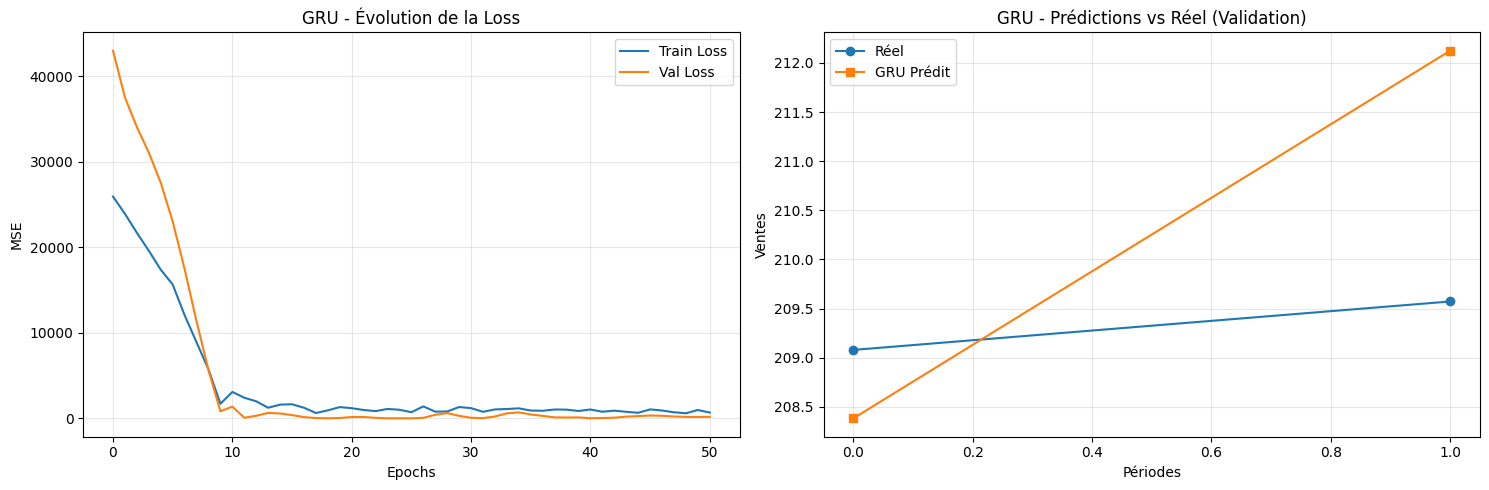

✅ GRU entraînement terminé!


In [ ]:
# ==============================================
# MODÈLE GRU
# ==============================================

print("=== CONFIGURATION GRU ===")
window_size_gru = 10  # Taille intermédiaire
batch_size_gru = 12

# Préparation des données pour GRU (même format que LSTM)
def prepare_gru_data(series, window_size):
    """Prépare les données pour GRU (format 3D)"""
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:(i + window_size)])
        y.append(series[i + window_size])
    return np.array(X).reshape(-1, window_size, 1), np.array(y)

# Création des datasets GRU
X_train_gru, y_train_gru = prepare_gru_data(x_train, window_size_gru)
X_val_gru, y_val_gru = prepare_gru_data(x_val, window_size_gru)

print(f"X_train_gru shape: {X_train_gru.shape}")
print(f"X_val_gru shape: {X_val_gru.shape}")

# Construction du modèle GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.GRU(64, activation='relu', return_sequences=True,
                       input_shape=(window_size_gru, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(32, activation='relu', return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilation
model_gru.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

print("\n=== ARCHITECTURE GRU ===")
model_gru.summary()

# Callbacks
gru_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=15, factor=0.5)
]

# Entraînement
print("\n=== ENTRAÎNEMENT GRU ===")
history_gru = model_gru.fit(
    X_train_gru, y_train_gru,
    batch_size=batch_size_gru,
    epochs=200,
    validation_data=(X_val_gru, y_val_gru),
    callbacks=gru_callbacks,
    verbose=1
)

# Évaluation
print("\n=== ÉVALUATION GRU ===")
gru_train_pred = model_gru.predict(X_train_gru).flatten()
gru_val_pred = model_gru.predict(X_val_gru).flatten()

# Métriques
gru_metrics = {
    'MAE_train': mean_absolute_error(y_train_gru, gru_train_pred),
    'MAE_val': mean_absolute_error(y_val_gru, gru_val_pred),
    'MSE_train': mean_squared_error(y_train_gru, gru_train_pred),
    'MSE_val': mean_squared_error(y_val_gru, gru_val_pred),
    'RMSE_val': np.sqrt(mean_squared_error(y_val_gru, gru_val_pred)),
    'MAPE_val': mean_absolute_percentage_error(y_val_gru, gru_val_pred)
}

print("Métriques GRU:")
for metric, value in gru_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Visualisation des résultats GRU
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title('GRU - Évolution de la Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(y_val_gru, label='Réel', marker='o')
plt.plot(gru_val_pred, label='GRU Prédit', marker='s')
plt.title('GRU - Prédictions vs Réel (Validation)')
plt.xlabel('Périodes')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ GRU entraînement terminé!")

# **Data M5**

✅ Fichiers extraits avec succès!
📁 Fichiers disponibles: ['sales_train_validation.csv', 'sell_prices.csv', 'sales_train_evaluation.csv', 'sample_submission.csv', 'calendar.csv']
✅ Données chargées avec succès!
📊 DESCRIPTION DU DATASET M5 FORECASTING ACCURACY

📈 SALES_TRAIN_VALIDATION.CSV
Shape: (30490, 1919)
Colonnes: ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1', 'd_2', 'd_3', 'd_4']...
Période couverte: d_1 à d_1913
Nombre de produits uniques: 3049
Nombre de magasins: 10
Nombre de catégories: 3
Nombre de départements: 7
Nombre d'états: 3

👀 APERÇU DES DONNÉES (premières lignes):
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907 

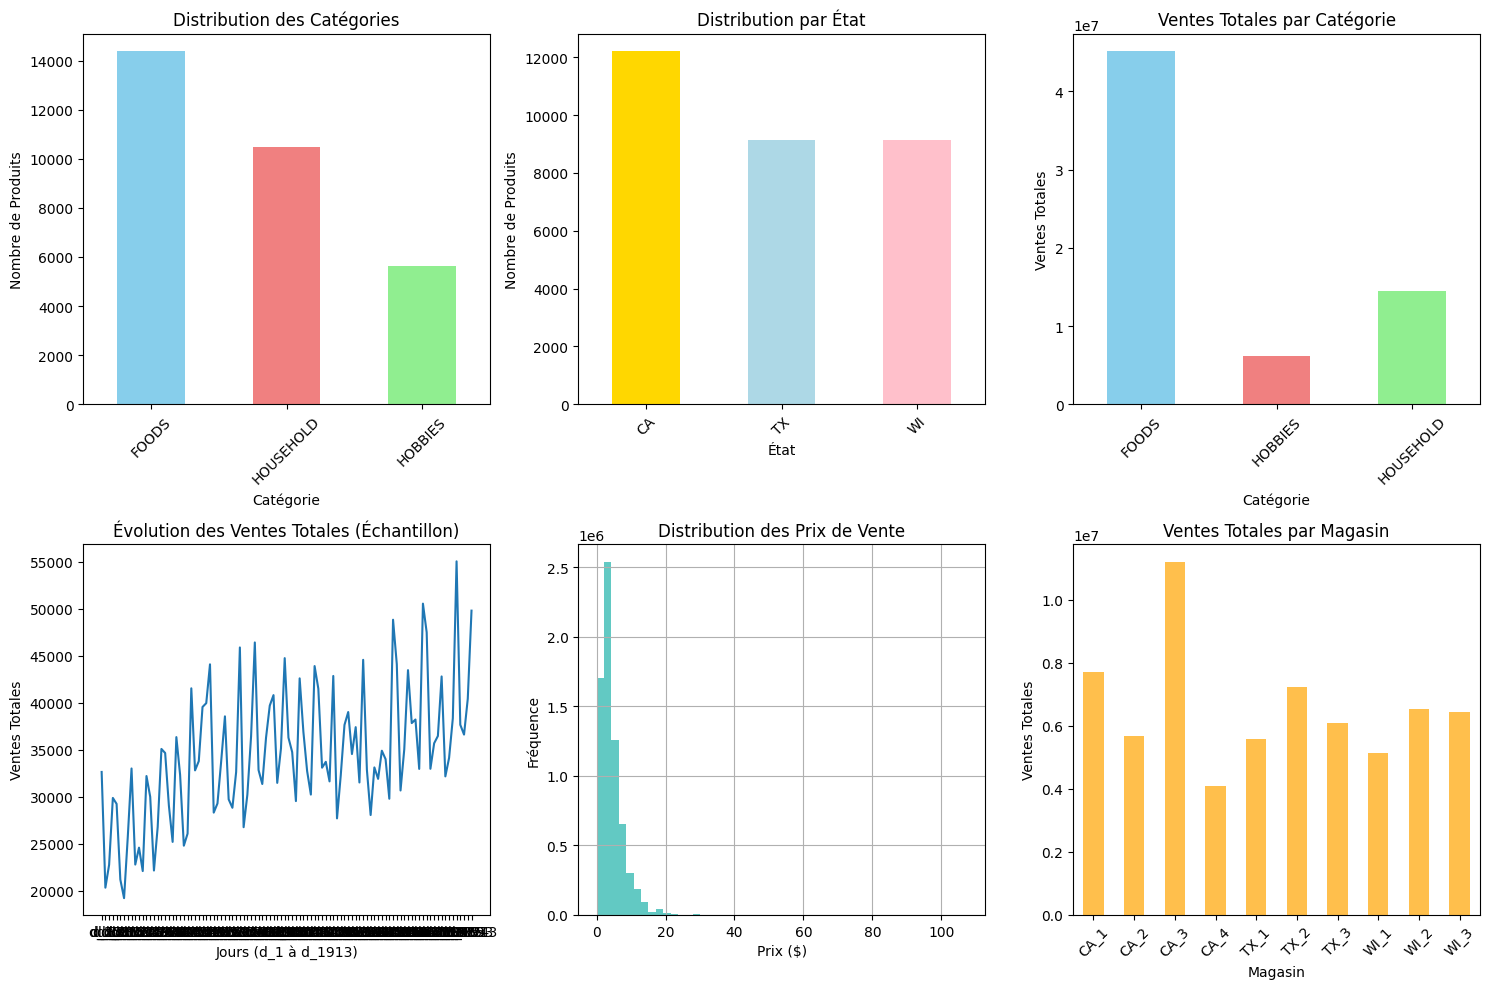


⏰ ANALYSE TEMPORELLE
Période analysée: 2011-01-29 00:00:00 to 2016-04-24 00:00:00
Nombre total de jours: 1913
Ventes totales sur la période: 65,695,409
Ventes moyennes par jour: 34342
Ventes médianes par jour: 33732


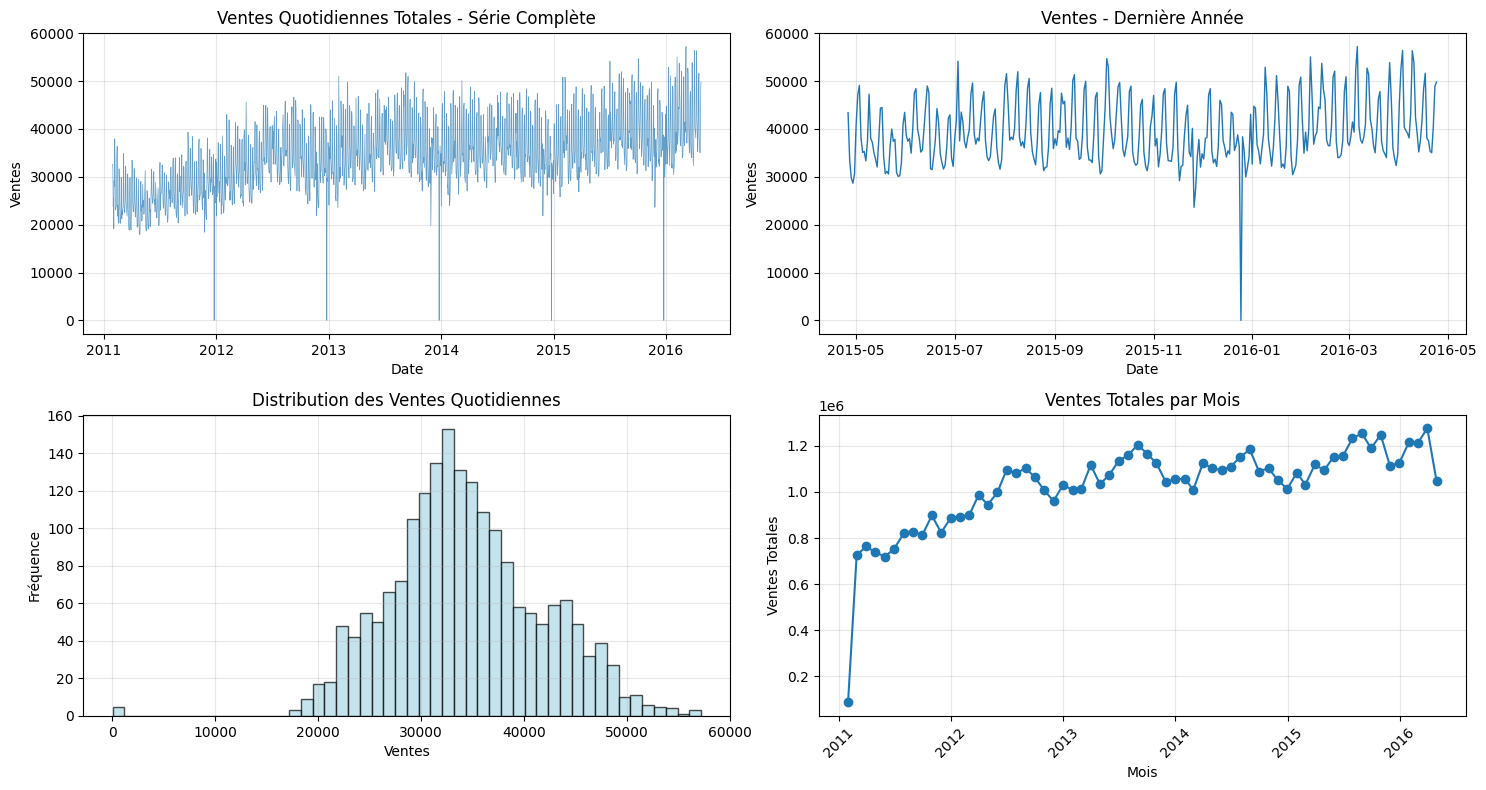


🎯 INSIGHTS PRINCIPAUX - DATASET M5

        📊 CARACTÉRISTIQUES CLÉS:
        • 30,490 séries temporelles uniques
        • 1913 jours de données historiques
        • 3 états, 10 magasins, 3 catégories, 7 départements
        • Données du 2011-01-29 au 2016-06-19

        🎯 DÉFI DE PRÉVISION:
        • Prévoir les ventes de 28 jours pour 30,490 séries
        • Structure hiérarchique complexe
        • Saisonnalités multiples (quotidienne, hebdomadaire, mensuelle, annuelle)
        • Impact des événements et promotions

        📈 APPROCHE RECOMMANDÉE:
        • Modèles hiérarchiques (SARIMA, ETS) pour chaque niveau
        • Machine Learning avec features temporelles
        • Méthodes ensemblistes
        • Modèles spécifiques par catégorie/magasin
        

📅 APERÇU DU CALENDRIER


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Chemin vers votre fichier zip
zip_path = '/content/drive/MyDrive/S9/applied-deep-learning/m5-forecasting-accuracy.zip'

# Dézipper le fichier
def extraire_m5(zip_path):
    """Extraire le dataset M5"""
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall('m5_data/')
        print("✅ Fichiers extraits avec succès!")

        # Lister les fichiers extraits
        fichiers = os.listdir('m5_data/')
        print(f"📁 Fichiers disponibles: {fichiers}")

    except Exception as e:
        print(f"❌ Erreur lors de l'extraction: {e}")

# Extraire les données
extraire_m5(zip_path)

# Charger les données
def charger_donnees_m5():
    """Charger tous les fichiers du dataset M5"""
    chemin = 'm5_data/'

    try:
        # Fichiers principaux
        vente_calendar = pd.read_csv(chemin + 'sales_train_validation.csv')
        calendar = pd.read_csv(chemin + 'calendar.csv')
        prices = pd.read_csv(chemin + 'sell_prices.csv')

        print("✅ Données chargées avec succès!")
        return vente_calendar, calendar, prices

    except FileNotFoundError as e:
        print(f"❌ Fichier non trouvé: {e}")
        # Lister les fichiers disponibles
        fichiers = os.listdir('m5_data/')
        print(f"📁 Fichiers disponibles dans m5_data/: {fichiers}")
        return None, None, None

# Chargement
vente_calendar, calendar, prices = charger_donnees_m5()

# Vérifier si le chargement a réussi
if vente_calendar is None:
    print("❌ Échec du chargement des données")
else:
    # Description basique du dataset
    def description_dataset(vente_calendar, calendar, prices):
        """Description complète du dataset M5"""

        print("=" * 80)
        print("📊 DESCRIPTION DU DATASET M5 FORECASTING ACCURACY")
        print("=" * 80)

        # Informations sur sales_train_validation
        print("\n📈 SALES_TRAIN_VALIDATION.CSV")
        print(f"Shape: {vente_calendar.shape}")
        print(f"Colonnes: {list(vente_calendar.columns[:10])}...")  # Premières 10 colonnes
        print(f"Période couverte: d_1 à d_{vente_calendar.shape[1]-6}")
        print(f"Nombre de produits uniques: {vente_calendar['item_id'].nunique()}")
        print(f"Nombre de magasins: {vente_calendar['store_id'].nunique()}")
        print(f"Nombre de catégories: {vente_calendar['cat_id'].nunique()}")
        print(f"Nombre de départements: {vente_calendar['dept_id'].nunique()}")
        print(f"Nombre d'états: {vente_calendar['state_id'].nunique()}")

        # Aperçu des données
        print("\n👀 APERÇU DES DONNÉES (premières lignes):")
        print(vente_calendar.head(3))

        # Informations sur calendar
        print("\n📅 CALENDAR.CSV")
        print(f"Shape: {calendar.shape}")
        print(f"Période: {calendar['date'].min()} to {calendar['date'].max()}")
        print(f"Jours uniques: {calendar['date'].nunique()}")
        print(f"Événements: {calendar['event_name_1'].nunique()} types d'événements")
        print(f"Colonnes calendrier: {list(calendar.columns)}")

        # Informations sur prices
        print("\n💰 SELL_PRICES.CSV")
        print(f"Shape: {prices.shape}")
        print(f"Prix moyen: ${prices['sell_price'].mean():.2f}")
        print(f"Prix min: ${prices['sell_price'].min():.2f}")
        print(f"Prix max: ${prices['sell_price'].max():.2f}")
        print(f"Nombre de produits avec prix: {prices['item_id'].nunique()}")

        # Mémoire utilisée
        print("\n💾 MÉMOIRE UTILISÉE")
        print(f"Sales: {vente_calendar.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        print(f"Calendar: {calendar.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        print(f"Prices: {prices.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

    # Appliquer la description
    description_dataset(vente_calendar, calendar, prices)

    # Exploration des ventes
    def explorer_ventes(vente_calendar):
        """Exploration détaillée des données de ventes"""

        print("\n" + "=" * 80)
        print("🔍 EXPLORATION DES VENTES")
        print("=" * 80)

        # Compter les valeurs par catégorie
        print("\n📦 RÉPARTITION PAR CATÉGORIES:")
        print(vente_calendar['cat_id'].value_counts())

        print("\n🏪 RÉPARTITION PAR MAGASINS:")
        print(vente_calendar['store_id'].value_counts())

        print("\n🗺️ RÉPARTITION PAR ÉTATS:")
        print(vente_calendar['state_id'].value_counts())

        # Statistiques des ventes
        colonnes_ventes = [col for col in vente_calendar.columns if col.startswith('d_')]
        ventes_array = vente_calendar[colonnes_ventes].values

        print(f"\n📊 STATISTIQUES DES VENTES QUOTIDIENNES:")
        print(f"Ventes totales: {ventes_array.sum():,}")
        print(f"Moyenne quotidienne par produit: {ventes_array.mean():.2f}")
        print(f"Médiane quotidienne: {np.median(ventes_array):.2f}")
        print(f"Jour avec plus de ventes: {ventes_array.max()}")
        print(f"Pourcentage de jours sans vente: {(ventes_array == 0).mean() * 100:.1f}%")

        # Ventes par catégorie
        print(f"\n📈 VENTES TOTALES PAR CATÉGORIE:")
        for cat in vente_calendar['cat_id'].unique():
            ventes_cat = vente_calendar[vente_calendar['cat_id'] == cat][colonnes_ventes].sum().sum()
            print(f"  {cat}: {ventes_cat:,} unités")

    explorer_ventes(vente_calendar)

    # Visualisations principales
    def visualisations_m5(vente_calendar, calendar, prices):
        """Créer des visualisations pour comprendre le dataset M5"""

        # 1. Distribution des catégories
        plt.figure(figsize=(15, 10))

        plt.subplot(2, 3, 1)
        vente_calendar['cat_id'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
        plt.title('Distribution des Catégories')
        plt.xlabel('Catégorie')
        plt.ylabel('Nombre de Produits')
        plt.xticks(rotation=45)

        # 2. Distribution des états
        plt.subplot(2, 3, 2)
        vente_calendar['state_id'].value_counts().plot(kind='bar', color=['gold', 'lightblue', 'pink'])
        plt.title('Distribution par État')
        plt.xlabel('État')
        plt.ylabel('Nombre de Produits')
        plt.xticks(rotation=45)

        # 3. Ventes totales par catégorie
        plt.subplot(2, 3, 3)
        colonnes_ventes = [col for col in vente_calendar.columns if col.startswith('d_')]
        ventes_par_categorie = vente_calendar.groupby('cat_id')[colonnes_ventes].sum().sum(axis=1)
        ventes_par_categorie.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
        plt.title('Ventes Totales par Catégorie')
        plt.xlabel('Catégorie')
        plt.ylabel('Ventes Totales')
        plt.xticks(rotation=45)

        # 4. Évolution temporelle des ventes totales
        plt.subplot(2, 3, 4)
        ventes_totales_par_jour = vente_calendar[colonnes_ventes].sum()
        # Prendre un échantillon de 100 points pour la lisibilité
        echantillon_jours = np.linspace(0, len(ventes_totales_par_jour)-1, 100, dtype=int)
        plt.plot(ventes_totales_par_jour.iloc[echantillon_jours])
        plt.title('Évolution des Ventes Totales (Échantillon)')
        plt.xlabel('Jours (d_1 à d_1913)')
        plt.ylabel('Ventes Totales')

        # 5. Distribution des prix
        plt.subplot(2, 3, 5)
        prices['sell_price'].hist(bins=50, color='lightseagreen', alpha=0.7)
        plt.title('Distribution des Prix de Vente')
        plt.xlabel('Prix ($)')
        plt.ylabel('Fréquence')

        # 6. Ventes par magasin
        plt.subplot(2, 3, 6)
        ventes_par_magasin = vente_calendar.groupby('store_id')[colonnes_ventes].sum().sum(axis=1)
        ventes_par_magasin.plot(kind='bar', color='orange', alpha=0.7)
        plt.title('Ventes Totales par Magasin')
        plt.xlabel('Magasin')
        plt.ylabel('Ventes Totales')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

    # Appliquer les visualisations
    visualisations_m5(vente_calendar, calendar, prices)

    # Analyse temporelle détaillée
    def analyse_temporelle(vente_calendar, calendar):
        """Analyse des patterns temporels"""

        print("\n" + "=" * 80)
        print("⏰ ANALYSE TEMPORELLE")
        print("=" * 80)

        # Préparer les données de ventes par jour
        colonnes_ventes = [col for col in vente_calendar.columns if col.startswith('d_')]
        ventes_par_jour = vente_calendar[colonnes_ventes].sum()

        # Convertir en série temporelle avec les dates réelles
        dates = pd.date_range(start='2011-01-29', periods=len(ventes_par_jour), freq='D')
        serie_ventes = pd.Series(ventes_par_jour.values, index=dates)

        print(f"Période analysée: {serie_ventes.index.min()} to {serie_ventes.index.max()}")
        print(f"Nombre total de jours: {len(serie_ventes)}")
        print(f"Ventes totales sur la période: {serie_ventes.sum():,}")
        print(f"Ventes moyennes par jour: {serie_ventes.mean():.0f}")
        print(f"Ventes médianes par jour: {serie_ventes.median():.0f}")

        # Visualisation de la série temporelle globale
        plt.figure(figsize=(15, 8))

        # Série temporelle complète
        plt.subplot(2, 2, 1)
        plt.plot(serie_ventes.index, serie_ventes.values, linewidth=0.5, alpha=0.7)
        plt.title('Ventes Quotidiennes Totales - Série Complète')
        plt.xlabel('Date')
        plt.ylabel('Ventes')
        plt.grid(True, alpha=0.3)

        # Dernière année pour plus de détails
        plt.subplot(2, 2, 2)
        derniere_annee = serie_ventes.last('365D')
        plt.plot(derniere_annee.index, derniere_annee.values, linewidth=1)
        plt.title('Ventes - Dernière Année')
        plt.xlabel('Date')
        plt.ylabel('Ventes')
        plt.grid(True, alpha=0.3)

        # Distribution des ventes quotidiennes
        plt.subplot(2, 2, 3)
        plt.hist(serie_ventes.values, bins=50, color='lightblue', alpha=0.7, edgecolor='black')
        plt.title('Distribution des Ventes Quotidiennes')
        plt.xlabel('Ventes')
        plt.ylabel('Fréquence')
        plt.grid(True, alpha=0.3)

        # Ventes par mois
        plt.subplot(2, 2, 4)
        ventes_par_mois = serie_ventes.resample('M').sum()
        plt.plot(ventes_par_mois.index, ventes_par_mois.values, marker='o')
        plt.title('Ventes Totales par Mois')
        plt.xlabel('Mois')
        plt.ylabel('Ventes Totales')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return serie_ventes

    # Appliquer l'analyse temporelle
    serie_ventes_totales = analyse_temporelle(vente_calendar, calendar)

    # Résumé final
    def resume_final(vente_calendar):
        """Résumé final des insights"""

        print("\n" + "=" * 80)
        print("🎯 INSIGHTS PRINCIPAUX - DATASET M5")
        print("=" * 80)

        colonnes_ventes = [col for col in vente_calendar.columns if col.startswith('d_')]
        total_series = vente_calendar.shape[0]
        total_jours = len(colonnes_ventes)

        print(f"""
        📊 CARACTÉRISTIQUES CLÉS:
        • {total_series:,} séries temporelles uniques
        • {total_jours} jours de données historiques
        • 3 états, 10 magasins, 3 catégories, {vente_calendar['dept_id'].nunique()} départements
        • Données du {calendar['date'].min()} au {calendar['date'].max()}

        🎯 DÉFI DE PRÉVISION:
        • Prévoir les ventes de 28 jours pour {total_series:,} séries
        • Structure hiérarchique complexe
        • Saisonnalités multiples (quotidienne, hebdomadaire, mensuelle, annuelle)
        • Impact des événements et promotions

        📈 APPROCHE RECOMMANDÉE:
        • Modèles hiérarchiques (SARIMA, ETS) pour chaque niveau
        • Machine Learning avec features temporelles
        • Méthodes ensemblistes
        • Modèles spécifiques par catégorie/magasin
        """)

    resume_final(vente_calendar)

    # Aperçu des données de calendrier
    print("\n" + "=" * 80)
    print("📅 APERÇU DU CALENDRIER")
    print("=" * 80)
    calendar[['date', 'wm_yr_wk', 'weekday', 'event_name_1']].head(10)

visualiser/ comprendre/ réduire pour qu'il soit manipulable par/ pmdarima/enregistrer le data réduit dans le drive (conserver 10 articles par regroupement)/garder la taille optimale /les enregistrements relatifs aux semaines wm yr wk/ un modele mlp lstm rnn / choisir les fenetres et comment spliter la data et faire sortir le meilleur modele  